In [1]:
import csv
import numpy as np 
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt 
import pickle
import statistics
import numpy as np  
import sys

pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 200)

In [2]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

**Sentiment Analysis provided by Upasana - Tweets need to be cleaned prior to using.**


In [4]:
def sentiment_analyzer_score_for_englishOnlyTweet(cleaned_tweet): #this function takes in a tweet that has been detected as an english tweet
    score = analyser.polarity_scores(cleaned_tweet) #so this cleaned_tweet is always an english tweet.
    lb = score['compound']
    return lb

**Read in list of users to analyze**

In [5]:
df = pd.read_csv("/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/DidNotMentionBack_Users/Filtered_EnglishUsers_DidNotMentionedBackUsers_FINAL.csv")
# temp2D = pd.read_csv(, low_memory=False)

# df = pd.read_csv('Filtered_EnglishUsers_DidnotMentionBackUsers.csv')
UserList = list(df['Users'])

In [6]:
# UserList.remove('SecludedSusie')
# UserList.remove('ScottFordTVGuy')
print(UserList[0])
len(UserList)


rustyrockets


2933

In [7]:
# temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)

In [8]:
# temp_user_db.head()

In [9]:
iraContactPoints = pd.read_csv('contact_IRAtoUser_Inf_NONRESPONSIVE.csv')
# iraContactPoints.head()

**Create dict of contact points, formatted: username -> [list of contact points]**

In [10]:
iraContactDict = {}
for i in range(len(iraContactPoints)):
    
    temp_list = iraContactPoints['tweet_date'][i].split(', ')
    temp_list[0] = temp_list[0][1:]
    temp_list[-1] = temp_list[-1][:-1]
    for j in range(len(temp_list)):
        temp_list[j] = temp_list[j][1:]
        temp_list[j] = temp_list[j][:-1]
#     temp_list.sort()
    iraContactDict[iraContactPoints['username'][i]] = temp_list


In [11]:
for key in iraContactDict:
    temp_list = iraContactDict[key]
    temp_list.sort()


In [12]:
# for key in iraContactDict:
#     print(key)
#     print(iraContactDict[key])
#     print("\n\n")

**Functions to check for a mention of Donald Trump or Hillary Clinton in a tweet**


In [13]:
def mentions_trump(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'realdonaldtrump':
                return True
    return False

In [14]:
def mentions_clinton(mention_string):
    if mention_string != "[]": 
        mention_list = mention_string.split(', ')
        mention_list[0] = mention_list[0][1:]
        mention_list[-1] = mention_list[-1][:-1]
        for x in range(len(mention_list)):
            mention_list[x] = mention_list[x][1:]
            mention_list[x] = mention_list[x][:-1]
        for x in range(len(mention_list)):
            if mention_list[x] == 'hillaryclinton':
                return True
    return False

**Create new DataFrame, which will hold all before / after analysis date in the form of lists**

In [15]:
beforeAfterDF = pd.DataFrame(columns=['username', 'first_contact', 'second_contact',
                                      'third_contact','tweet_count','sentiment_scores', 
                                      'trump_count', 'clinton_count','trump_sent','clinton_sent',
                                      'positive_sent', 'negative_sent'])

In [16]:
befAftCounts = pd.DataFrame(columns=['username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3',
                                    'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3',
                                    'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3',
                                    'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3',
                                    'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3',
                                    'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3',
                                    'before_sentiment1', 'before_sentiment2', 'before_sentiment3',
                                    'after_sentiment1', 'after_sentiment2', 'after_sentiment3',
                                    'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3',
                                    'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3',
                                    'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3',
                                    'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3',
                                    'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3',
                                    'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',
                                    'before_negative_sent1', 'before_negative_sent2', 'before_negative_sent3',
                                    'after_negative_sent1', 'after_negative_sent2', 'after_negative_sent3'
                                    ])

In [17]:
temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[0]+'.csv', header=None, low_memory=False)

In [18]:
temp_user_db.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,1258122612401532928,1258122612401532928,1588794780000,2020-05-06,19:53:00,UTC,19562228,rustyrockets,Russell Brand,NaN,with meditation master of ! Listen in full thi...,"['meditationbob', 'lynchfoundation', 'hearlumi...",['https://youtu.be/WBrmjWS98Gs'],[],16,27,164,['#undertheskin'],[],https://twitter.com/rustyrockets/status/125812...,False,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19562228', 'username': 'rustyroc...",NaN,NaN,NaN,NaN
1,1257388399574556673,1257388399574556673,1588619730000,2020-05-04,19:15:30,UTC,19562228,rustyrockets,Russell Brand,NaN,with Full video:,['rickgervais'],['https://youtu.be/H87oudm239w'],[],39,89,536,['#undertheskin'],[],https://twitter.com/rustyrockets/status/125738...,False,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19562228', 'username': 'rustyroc...",NaN,NaN,NaN,NaN
2,1257025885800001536,1257025885800001536,1588533300000,2020-05-03,19:15:00,UTC,19562228,rustyrockets,Russell Brand,NaN,"Why are people suddenly Googling ""Prayer""? Ful...",[],['https://youtu.be/PajaN2nhZEQ'],[],90,142,693,[],[],https://twitter.com/rustyrockets/status/125702...,False,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19562228', 'username': 'rustyroc...",NaN,NaN,NaN,NaN
3,1256627773629698048,1256627773629698048,1588438382000,2020-05-02,16:53:02,UTC,19562228,rustyrockets,Russell Brand,NaN,Godmother of creativity and priestess of moder...,"['gilbertliz', 'hearluminary']",['http://Luminary.link/russell'],[],13,9,105,['#undertheskin'],[],https://twitter.com/rustyrockets/status/125662...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19562228', 'username': 'rustyroc...",NaN,NaN,NaN,NaN
4,1256309414941855744,1256309414941855744,1588362480000,2020-05-01,19:48:00,UTC,19562228,rustyrockets,Russell Brand,NaN,A clip from with neuroscientist . You can list...,"['davideagleman', 'hearluminary']",[],[],22,28,175,['#undertheskin'],[],https://twitter.com/rustyrockets/status/125630...,False,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19562228', 'username': 'rustyroc...",NaN,NaN,NaN,NaN


In [18]:
# iraContactDict

In [19]:
# contact_list = iraContactDict[UserList[0]]
# first_contact = contact_list[0][:-6]

In [20]:
# contact_list

In [21]:
# iraContactDict

In [22]:
first_tweet_dict = {}
size = str(len(UserList))
for i in range(len(UserList)):
# for i in range(10):
    try:
        #create temp DF
        temp_user_db = pd.read_csv('/home/updu6059/Twint_Data/ParallelProcessing/Famous_Users/User_Data/English_Only_Tweets/'+UserList[i]+'.csv', header=None, low_memory=False)
        #save first tweet date
        first_tweet_date = temp_user_db[3][len(temp_user_db)-1]
        first_tweet_dict[UserList[i]] = first_tweet_date
        #initialize values
        tweet_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        trump_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        clinton_count = [
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        sentiment_scores = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        trump_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        clinton_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        positive_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        negative_sent = [
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
            [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
        
        username = UserList[i]
        contact_list = iraContactDict[username]
        first_contact = contact_list[0][:-6]
        first_contact = dt.strptime(first_contact, "%Y-%m-%d")
        second_contact = None
        third_contact = None
        if(len(contact_list) >= 2):
            second_contact = contact_list[1][:-6]
            second_contact = dt.strptime(second_contact, "%Y-%m-%d")
        if(len(contact_list) >= 3):
            third_contact = contact_list[2][:-6]
            third_contact = dt.strptime(third_contact, "%Y-%m-%d")
        #iterate through all tweets
        for j in range(len(temp_user_db)):
            #year one check
            current_date = temp_user_db[3][j]
            current_date = dt.strptime(current_date, "%Y-%m-%d")
            difference = ((((current_date - first_contact).total_seconds())/60)/60)/24
            if(difference >= -372 and difference <= 372):
                temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                if(difference < 0):
                    if (difference <= -341 and difference > -372): #-12
                        
                        if trump_flag: trump_count[0] += 1
                        if clinton_flag: clinton_count[0] += 1
                        sentiment_scores[0].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[0].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[0].append(temp_sent)
                        if temp_sent > 0: postweet_count[0] +=1itive_sent[0].append(temp_sent)
                        if temp_sent < 0: negative_sent[0].append(temp_sent)
                    elif (difference <= -310 and difference > -341): #-11
                        tweet_count[1] +=1
                        if trump_flag: trump_count[1] += 1
                        if clinton_flag: clinton_count[1] += 1
                        sentiment_scores[1].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[1].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[1].append(temp_sent)
                        if temp_sent > 0: positive_sent[1].append(temp_sent)
                        if temp_sent < 0: negative_sent[1].append(temp_sent)
                    elif (difference <= -279 and difference > -310): #-10
                        tweet_count[2] +=1
                        if trump_flag: trump_count[2] += 1
                        if clinton_flag: clinton_count[2] += 1
                        sentiment_scores[2].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[2].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[2].append(temp_sent)
                        if temp_sent > 0: positive_sent[2].append(temp_sent)
                        if temp_sent < 0: negative_sent[2].append(temp_sent)
                    elif (difference <= -248 and difference > -279): #-9
                        tweet_count[3] +=1
                        if trump_flag: trump_count[3] += 1
                        if clinton_flag: clinton_count[3] += 1
                        sentiment_scores[3].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[3].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[3].append(temp_sent)
                        if temp_sent > 0: positive_sent[3].append(temp_sent)
                        if temp_sent < 0: negative_sent[3].append(temp_sent)
                    elif (difference <= -217 and difference > -248): #-8
                        tweet_count[4] +=1
                        if trump_flag: trump_count[4] += 1
                        if clinton_flag: clinton_count[4] += 1
                        sentiment_scores[4].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[4].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[4].append(temp_sent)
                        if temp_sent > 0: positive_sent[4].append(temp_sent)
                        if temp_sent < 0: negative_sent[4].append(temp_sent)
                    elif (difference <= -186 and difference > -217): #-7
                        tweet_count[5] +=1
                        if trump_flag: trump_count[5] += 1
                        if clinton_flag: clinton_count[5] += 1
                        sentiment_scores[5].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[5].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[5].append(temp_sent)
                        if temp_sent > 0: positive_sent[5].append(temp_sent)
                        if temp_sent < 0: negative_sent[5].append(temp_sent)    
                    elif (difference <= -155 and difference > -186): #-6
                        tweet_count[6] +=1
                        if trump_flag: trump_count[6] += 1
                        if clinton_flag: clinton_count[6] += 1
                        sentiment_scores[6].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[6].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[6].append(temp_sent)
                        if temp_sent > 0: positive_sent[6].append(temp_sent)
                        if temp_sent < 0: negative_sent[6].append(temp_sent)
                    elif (difference <= -124 and difference > -155): #-5
                        tweet_count[7] +=1
                        if trump_flag: trump_count[7] += 1
                        if clinton_flag: clinton_count[7] += 1
                        sentiment_scores[7].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[7].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[7].append(temp_sent)
                        if temp_sent > 0: positive_sent[7].append(temp_sent)
                        if temp_sent < 0: negative_sent[7].append(temp_sent)
                    elif (difference <= -93 and difference > -124): #-4
                        tweet_count[8] +=1
                        if trump_flag: trump_count[8] += 1
                        if clinton_flag: clinton_count[8] += 1
                        sentiment_scores[8].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[8].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[8].append(temp_sent)
                        if temp_sent > 0: positive_sent[8].append(temp_sent)
                        if temp_sent < 0: negative_sent[8].append(temp_sent)
                    elif (difference <= -62 and difference > -93): #-3
                        tweet_count[9] +=1
                        if trump_flag: trump_count[9] += 1
                        if clinton_flag: clinton_count[9] += 1
                        sentiment_scores[9].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[9].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[9].append(temp_sent)
                        if temp_sent > 0: positive_sent[9].append(temp_sent)
                        if temp_sent < 0: negative_sent[9].append(temp_sent)
                    elif (difference <= -31 and difference > -62): #-2
                        tweet_count[10] +=1
                        if trump_flag: trump_count[10] += 1
                        if clinton_flag: clinton_count[10] += 1
                        sentiment_scores[10].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[10].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[10].append(temp_sent)
                        if temp_sent > 0: positive_sent[10].append(temp_sent)
                        if temp_sent < 0: negative_sent[10].append(temp_sent)
                    elif (difference <= 0 and difference > -31): #-1
                        tweet_count[11] +=1
                        if trump_flag: trump_count[11] += 1
                        if clinton_flag: clinton_count[11] += 1
                        sentiment_scores[11].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[11].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[11].append(temp_sent)
                        if temp_sent > 0: positive_sent[11].append(temp_sent)
                        if temp_sent < 0: negative_sent[11].append(temp_sent)
                if(difference >= 0):
                    if (difference >= 0 and difference < 31): #1 
                        tweet_count[12] +=1
                        if trump_flag: trump_count[12] += 1
                        if clinton_flag: clinton_count[12] += 1
                        sentiment_scores[12].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[12].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[12].append(temp_sent)
                        if temp_sent > 0: positive_sent[12].append(temp_sent)
                        if temp_sent < 0: negative_sent[12].append(temp_sent)
                    elif (difference >= 31 and difference < 62): #2 
                        tweet_count[13] +=1
                        if trump_flag: trump_count[13] += 1
                        if clinton_flag: clinton_count[13] += 1
                        sentiment_scores[13].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[13].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[13].append(temp_sent)
                        if temp_sent > 0: positive_sent[13].append(temp_sent)
                        if temp_sent < 0: negative_sent[13].append(temp_sent)
                    elif (difference >= 62 and difference < 93): #3
                        tweet_count[14] +=1
                        if trump_flag: trump_count[14] += 1
                        if clinton_flag: clinton_count[14] += 1
                        sentiment_scores[14].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[14].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[14].append(temp_sent)
                        if temp_sent > 0: positive_sent[14].append(temp_sent)
                        if temp_sent < 0: negative_sent[14].append(temp_sent)
                    elif (difference >= 93 and difference < 124): #4
                        tweet_count[15] +=1
                        if trump_flag: trump_count[15] += 1
                        if clinton_flag: clinton_count[15] += 1
                        sentiment_scores[15].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[15].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[15].append(temp_sent)
                        if temp_sent > 0: positive_sent[15].append(temp_sent)
                        if temp_sent < 0: negative_sent[15].append(temp_sent)
                    elif (difference >= 124 and difference < 155): #5
                        tweet_count[16] +=1
                        if trump_flag: trump_count[16] += 1
                        if clinton_flag: clinton_count[16] += 1
                        sentiment_scores[16].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[16].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[16].append(temp_sent)
                        if temp_sent > 0: positive_sent[16].append(temp_sent)
                        if temp_sent < 0: negative_sent[16].append(temp_sent)
                    elif (difference >= 155 and difference < 186): #6
                        tweet_count[17] +=1
                        if trump_flag: trump_count[17] += 1
                        if clinton_flag: clinton_count[17] += 1
                        sentiment_scores[17].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[17].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[17].append(temp_sent)
                        if temp_sent > 0: positive_sent[17].append(temp_sent)
                        if temp_sent < 0: negative_sent[17].append(temp_sent)
                    elif (difference >= 186 and difference < 217): #7
                        tweet_count[18] +=1
                        if trump_flag: trump_count[18] += 1
                        if clinton_flag: clinton_count[18] += 1
                        sentiment_scores[18].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[18].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[18].append(temp_sent)
                        if temp_sent > 0: positive_sent[18].append(temp_sent)
                        if temp_sent < 0: negative_sent[18].append(temp_sent)
                    elif (difference >= 217 and difference < 248): #8
                        tweet_count[19] += 1
                        if trump_flag: trump_count[19] += 1
                        if clinton_flag: clinton_count[19] += 1
                        sentiment_scores[19].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[19].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[19].append(temp_sent)
                        if temp_sent > 0: positive_sent[19].append(temp_sent)
                        if temp_sent < 0: negative_sent[19].append(temp_sent)
                    elif (difference >= 248 and difference < 279): #9
                        tweet_count[20] +=1
                        if trump_flag: trump_count[20] += 1
                        if clinton_flag: clinton_count[20] += 1
                        sentiment_scores[20].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[20].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[20].append(temp_sent)
                        if temp_sent > 0: positive_sent[20].append(temp_sent)
                        if temp_sent < 0: negative_sent[20].append(temp_sent)
                    elif (difference >= 279 and difference < 310): #10
                        tweet_count[21] +=1
                        if trump_flag: trump_count[21] += 1
                        if clinton_flag: clinton_count[21] += 1
                        sentiment_scores[21].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[21].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[21].append(temp_sent)
                        if temp_sent > 0: positive_sent[21].append(temp_sent)
                        if temp_sent < 0: negative_sent[21].append(temp_sent)
                    elif (difference >= 310 and difference < 341): #11 
                        tweet_count[22] +=1
                        if trump_flag: trump_count[22] += 1
                        if clinton_flag: clinton_count[22] += 1
                        sentiment_scores[22].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[22].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[22].append(temp_sent)
                        if temp_sent > 0: positive_sent[22].append(temp_sent)
                        if temp_sent < 0: negative_sent[22].append(temp_sent)
                    elif (difference >= 341 and difference < 372): #12  
                        tweet_count[23] +=1
                        if trump_flag: trump_count[23] += 1
                        if clinton_flag: clinton_count[23] += 1
                        sentiment_scores[23].append(temp_sent)
                        if trump_flag and not clinton_flag: trump_sent[23].append(temp_sent)
                        if clinton_flag and not trump_flag: clinton_sent[23].append(temp_sent)
                        if temp_sent > 0: positive_sent[23].append(temp_sent)
                        if temp_sent < 0: negative_sent[23].append(temp_sent)
            #year two check
            if(second_contact != None):
                difference = ((((current_date - second_contact).total_seconds())/60)/60)/24
                trump_flag = mentions_trump(str(temp_user_db[11][j]))
                clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[24] +=1
                            if trump_flag: trump_count[24] += 1
                            if clinton_flag: clinton_count[24] += 1
                            sentiment_scores[24].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[24].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[24].append(temp_sent)
                            if temp_sent > 0: positive_sent[24].append(temp_sent)
                            if temp_sent < 0: negative_sent[24].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[25] +=1
                            if trump_flag: trump_count[25] += 1
                            if clinton_flag: clinton_count[25] += 1
                            sentiment_scores[25].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[25].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[25].append(temp_sent)
                            if temp_sent > 0: positive_sent[25].append(temp_sent)
                            if temp_sent < 0: negative_sent[25].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[26] +=1
                            if trump_flag: trump_count[26] += 1
                            if clinton_flag: clinton_count[26] += 1
                            sentiment_scores[26].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[26].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[26].append(temp_sent)
                            if temp_sent > 0: positive_sent[26].append(temp_sent)
                            if temp_sent < 0: negative_sent[26].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[27] +=1
                            if trump_flag: trump_count[27] += 1
                            if clinton_flag: clinton_count[27] += 1
                            sentiment_scores[27].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[27].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[27].append(temp_sent)
                            if temp_sent > 0: positive_sent[27].append(temp_sent)
                            if temp_sent < 0: negative_sent[27].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[28] +=1
                            if trump_flag: trump_count[28] += 1
                            if clinton_flag: clinton_count[28] += 1
                            sentiment_scores[28].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[28].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[28].append(temp_sent)
                            if temp_sent > 0: positive_sent[28].append(temp_sent)
                            if temp_sent < 0: negative_sent[28].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[29] +=1
                            if trump_flag: trump_count[29] += 1
                            if clinton_flag: clinton_count[29] += 1
                            sentiment_scores[29].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[29].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[29].append(temp_sent)
                            if temp_sent > 0: positive_sent[29].append(temp_sent)
                            if temp_sent < 0: negative_sent[29].append(temp_sent)
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[30] +=1
                            if trump_flag: trump_count[30] += 1
                            if clinton_flag: clinton_count[30] += 1
                            sentiment_scores[30].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[30].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[30].append(temp_sent)
                            if temp_sent > 0: positive_sent[30].append(temp_sent)
                            if temp_sent < 0: negative_sent[30].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[31] +=1
                            if trump_flag: trump_count[31] += 1
                            if clinton_flag: clinton_count[31] += 1
                            sentiment_scores[31].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[31].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[31].append(temp_sent)
                            if temp_sent > 0: positive_sent[31].append(temp_sent)
                            if temp_sent < 0: negative_sent[31].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[32] +=1
                            if trump_flag: trump_count[32] += 1
                            if clinton_flag: clinton_count[32] += 1
                            sentiment_scores[32].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[32].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[32].append(temp_sent)
                            if temp_sent > 0: positive_sent[32].append(temp_sent)
                            if temp_sent < 0: negative_sent[32].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[33] +=1
                            if trump_flag: trump_count[33] += 1
                            if clinton_flag: clinton_count[33] += 1
                            sentiment_scores[33].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[33].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[33].append(temp_sent)
                            if temp_sent > 0: positive_sent[33].append(temp_sent)
                            if temp_sent < 0: negative_sent[33].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[34] +=1
                            if trump_flag: trump_count[34] += 1
                            if clinton_flag: clinton_count[34] += 1
                            sentiment_scores[34].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[34].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[34].append(temp_sent)
                            if temp_sent > 0: positive_sent[34].append(temp_sent)
                            if temp_sent < 0: negative_sent[34].append(temp_sent)
                        elif (difference <= 0 and difference > -31): #-1
                            tweet_count[35] +=1
                            if trump_flag: trump_count[35] += 1
                            if clinton_flag: clinton_count[35] += 1
                            sentiment_scores[35].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[35].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[35].append(temp_sent)
                            if temp_sent > 0: positive_sent[35].append(temp_sent)
                            if temp_sent < 0: negative_sent[35].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[36] +=1
                            if trump_flag: trump_count[36] += 1
                            if clinton_flag: clinton_count[36] += 1
                            sentiment_scores[36].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[36].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[36].append(temp_sent)
                            if temp_sent > 0: positive_sent[36].append(temp_sent)
                            if temp_sent < 0: negative_sent[36].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[37] +=1
                            if trump_flag: trump_count[37] += 1
                            if clinton_flag: clinton_count[37] += 1
                            sentiment_scores[37].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[37].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[37].append(temp_sent)
                            if temp_sent > 0: positive_sent[37].append(temp_sent)
                            if temp_sent < 0: negative_sent[37].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[38] +=1
                            if trump_flag: trump_count[38] += 1
                            if clinton_flag: clinton_count[38] += 1
                            sentiment_scores[38].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[38].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[38].append(temp_sent)
                            if temp_sent > 0: positive_sent[38].append(temp_sent)
                            if temp_sent < 0: negative_sent[38].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[39] +=1
                            if trump_flag: trump_count[39] += 1
                            if clinton_flag: clinton_count[39] += 1
                            sentiment_scores[39].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[39].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[39].append(temp_sent)
                            if temp_sent > 0: positive_sent[39].append(temp_sent)
                            if temp_sent < 0: negative_sent[39].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[40] +=1
                            if trump_flag: trump_count[40] += 1
                            if clinton_flag: clinton_count[40] += 1
                            sentiment_scores[40].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[40].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[40].append(temp_sent)
                            if temp_sent > 0: positive_sent[40].append(temp_sent)
                            if temp_sent < 0: negative_sent[40].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[41] +=1
                            if trump_flag: trump_count[41] += 1
                            if clinton_flag: clinton_count[41] += 1
                            sentiment_scores[41].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[41].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[41].append(temp_sent)
                            if temp_sent > 0: positive_sent[41].append(temp_sent)
                            if temp_sent < 0: negative_sent[41].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[42] +=1
                            if trump_flag: trump_count[42] += 1
                            if clinton_flag: clinton_count[42] += 1
                            sentiment_scores[42].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[42].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[42].append(temp_sent)
                            if temp_sent > 0: positive_sent[42].append(temp_sent)
                            if temp_sent < 0: negative_sent[42].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[43] += 1
                            if trump_flag: trump_count[43] += 1
                            if clinton_flag: clinton_count[43] += 1
                            sentiment_scores[43].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[43].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[43].append(temp_sent)
                            if temp_sent > 0: positive_sent[43].append(temp_sent)
                            if temp_sent < 0: negative_sent[43].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[44] +=1
                            if trump_flag: trump_count[44] += 1
                            if clinton_flag: clinton_count[44] += 1
                            sentiment_scores[44].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[44].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[44].append(temp_sent)
                            if temp_sent > 0: positive_sent[44].append(temp_sent)
                            if temp_sent < 0: negative_sent[44].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[45] +=1
                            if trump_flag: trump_count[45] += 1
                            if clinton_flag: clinton_count[45] += 1
                            sentiment_scores[45].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[45].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[45].append(temp_sent)
                            if temp_sent > 0: positive_sent[45].append(temp_sent)
                            if temp_sent < 0: negative_sent[45].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[46] +=1
                            if trump_flag: trump_count[46] += 1
                            if clinton_flag: clinton_count[46] += 1
                            sentiment_scores[46].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[46].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[46].append(temp_sent)
                            if temp_sent > 0: positive_sent[46].append(temp_sent)
                            if temp_sent < 0: negative_sent[46].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[47] +=1
                            if trump_flag: trump_count[47] += 1
                            if clinton_flag: clinton_count[47] += 1
                            sentiment_scores[47].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[47].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[47].append(temp_sent)
                            if temp_sent > 0: positive_sent[47].append(temp_sent)
                            if temp_sent < 0: negative_sent[47].append(temp_sent)
            #year three check
            if(third_contact != None):
                difference = ((((current_date - third_contact).total_seconds())/60)/60)/24
                if(difference >= -372 and difference <= 372):
                    temp_sent = sentiment_analyzer_score_for_englishOnlyTweet(temp_user_db[10][j])
                    trump_flag = mentions_trump(str(temp_user_db[11][j]))
                    clinton_flag = mentions_clinton(str(temp_user_db[11][j]))
                    if(difference < 0):
                        if (difference <= -341 and difference > -372): #-12
                            tweet_count[48] +=1
                            if trump_flag: trump_count[48] += 1
                            if clinton_flag: clinton_count[48] += 1
                            sentiment_scores[48].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[48].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[48].append(temp_sent)
                            if temp_sent > 0: positive_sent[48].append(temp_sent)
                            if temp_sent < 0: negative_sent[48].append(temp_sent)
                        elif (difference <= -310 and difference > -341): #-11
                            tweet_count[49] +=1
                            if trump_flag: trump_count[49] += 1
                            if clinton_flag: clinton_count[49] += 1
                            sentiment_scores[49].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[49].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[49].append(temp_sent)
                            if temp_sent > 0: positive_sent[49].append(temp_sent)
                            if temp_sent < 0: negative_sent[49].append(temp_sent)
                        elif (difference <= -279 and difference > -310): #-10
                            tweet_count[50] +=1
                            if trump_flag: trump_count[50] += 1
                            if clinton_flag: clinton_count[50] += 1
                            sentiment_scores[50].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[50].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[50].append(temp_sent)
                            if temp_sent > 0: positive_sent[50].append(temp_sent)
                            if temp_sent < 0: negative_sent[50].append(temp_sent)
                        elif (difference <= -248 and difference > -279): #-9
                            tweet_count[51] +=1
                            if trump_flag: trump_count[51] += 1
                            if clinton_flag: clinton_count[51] += 1
                            sentiment_scores[51].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[51].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[51].append(temp_sent)
                            if temp_sent > 0: positive_sent[51].append(temp_sent)
                            if temp_sent < 0: negative_sent[51].append(temp_sent)
                        elif (difference <= -217 and difference > -248): #-8
                            tweet_count[52] +=1
                            if trump_flag: trump_count[52] += 1
                            if clinton_flag: clinton_count[52] += 1
                            sentiment_scores[52].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[52].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[52].append(temp_sent)
                            if temp_sent > 0: positive_sent[52].append(temp_sent)
                            if temp_sent < 0: negative_sent[52].append(temp_sent)
                        elif (difference <= -186 and difference > -217): #-7
                            tweet_count[53] +=1
                            if trump_flag: trump_count[53] += 1
                            if clinton_flag: clinton_count[53] += 1
                            sentiment_scores[53].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[53].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[53].append(temp_sent)
                            if temp_sent > 0: positive_sent[53].append(temp_sent)
                            if temp_sent < 0: negative_sent[53].append(temp_sent)
                        elif (difference <= -155 and difference > -186): #-6
                            tweet_count[54] +=1
                            if trump_flag: trump_count[54] += 1
                            if clinton_flag: clinton_count[54] += 1
                            sentiment_scores[54].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[54].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[54].append(temp_sent)
                            if temp_sent > 0: positive_sent[54].append(temp_sent)
                            if temp_sent < 0: negative_sent[54].append(temp_sent)
                        elif (difference <= -124 and difference > -155): #-5
                            tweet_count[55] +=1
                            if trump_flag: trump_count[55] += 1
                            if clinton_flag: clinton_count[55] += 1
                            sentiment_scores[55].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[55].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[55].append(temp_sent)
                            if temp_sent > 0: positive_sent[55].append(temp_sent)
                            if temp_sent < 0: negative_sent[55].append(temp_sent)
                        elif (difference <= -93 and difference > -124): #-4
                            tweet_count[56] +=1
                            if trump_flag: trump_count[56] += 1
                            if clinton_flag: clinton_count[56] += 1
                            sentiment_scores[56].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[56].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[56].append(temp_sent)
                            if temp_sent > 0: positive_sent[56].append(temp_sent)
                            if temp_sent < 0: negative_sent[56].append(temp_sent)
                        elif (difference <= -62 and difference > -93): #-3
                            tweet_count[57] +=1
                            if trump_flag: trump_count[57] += 1
                            if clinton_flag: clinton_count[57] += 1
                            sentiment_scores[57].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[57].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[57].append(temp_sent)
                            if temp_sent > 0: positive_sent[57].append(temp_sent)
                            if temp_sent < 0: negative_sent[57].append(temp_sent)
                        elif (difference <= -31 and difference > -62): #-2
                            tweet_count[58] +=1
                            if trump_flag: trump_count[58] += 1
                            if clinton_flag: clinton_count[58] += 1
                            sentiment_scores[58].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[58].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[58].append(temp_sent)
                            if temp_sent > 0: positive_sent[58].append(temp_sent)
                            if temp_sent < 0: negative_sent[58].append(temp_sent)
                        elif (difference < 0 and difference > -31): #-1
                            tweet_count[59] +=1
                            if trump_flag: trump_count[59] += 1
                            if clinton_flag: clinton_count[59] += 1
                            sentiment_scores[59].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[59].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[59].append(temp_sent)
                            if temp_sent > 0: positive_sent[59].append(temp_sent)
                            if temp_sent < 0: negative_sent[59].append(temp_sent)
                    if(difference >= 0):
                        if (difference >= 0 and difference < 31): #1 
                            tweet_count[60] +=1
                            if trump_flag: trump_count[60] += 1
                            if clinton_flag: clinton_count[60] += 1
                            sentiment_scores[60].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[60].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[60].append(temp_sent)
                            if temp_sent > 0: positive_sent[60].append(temp_sent)
                            if temp_sent < 0: negative_sent[60].append(temp_sent)
                        elif (difference >= 31 and difference < 62): #2 
                            tweet_count[61] +=1
                            if trump_flag: trump_count[61] += 1
                            if clinton_flag: clinton_count[61] += 1
                            sentiment_scores[61].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[61].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[61].append(temp_sent)
                            if temp_sent > 0: positive_sent[61].append(temp_sent)
                            if temp_sent < 0: negative_sent[61].append(temp_sent)
                        elif (difference >= 62 and difference < 93): #3
                            tweet_count[62] +=1
                            if trump_flag: trump_count[62] += 1
                            if clinton_flag: clinton_count[62] += 1
                            sentiment_scores[62].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[62].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[62].append(temp_sent)
                            if temp_sent > 0: positive_sent[62].append(temp_sent)
                            if temp_sent < 0: negative_sent[62].append(temp_sent)
                        elif (difference >= 93 and difference < 124): #4
                            tweet_count[63] +=1
                            if trump_flag: trump_count[63] += 1
                            if clinton_flag: clinton_count[63] += 1
                            sentiment_scores[63].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[63].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[63].append(temp_sent)
                            if temp_sent > 0: positive_sent[63].append(temp_sent)
                            if temp_sent < 0: negative_sent[63].append(temp_sent)
                        elif (difference >= 124 and difference < 155): #5
                            tweet_count[64] +=1
                            if trump_flag: trump_count[64] += 1
                            if clinton_flag: clinton_count[64] += 1
                            sentiment_scores[64].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[64].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[64].append(temp_sent)
                            if temp_sent > 0: positive_sent[64].append(temp_sent)
                            if temp_sent < 0: negative_sent[64].append(temp_sent)
                        elif (difference >= 155 and difference < 186): #6
                            tweet_count[65] +=1
                            if trump_flag: trump_count[65] += 1
                            if clinton_flag: clinton_count[65] += 1
                            sentiment_scores[65].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[65].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[65].append(temp_sent)
                            if temp_sent > 0: positive_sent[65].append(temp_sent)
                            if temp_sent < 0: negative_sent[65].append(temp_sent)
                        elif (difference >= 186 and difference < 217): #7
                            tweet_count[66] +=1
                            if trump_flag: trump_count[66] += 1
                            if clinton_flag: clinton_count[66] += 1
                            sentiment_scores[66].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[66].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[66].append(temp_sent)
                            if temp_sent > 0: positive_sent[66].append(temp_sent)
                            if temp_sent < 0: negative_sent[66].append(temp_sent)
                        elif (difference >= 217 and difference < 248): #8
                            tweet_count[67] += 1
                            if trump_flag: trump_count[67] += 1
                            if clinton_flag: clinton_count[67] += 1
                            sentiment_scores[67].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[67].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[67].append(temp_sent)
                            if temp_sent > 0: positive_sent[67].append(temp_sent)
                            if temp_sent < 0: negative_sent[67].append(temp_sent)
                        elif (difference >= 248 and difference < 279): #9
                            tweet_count[68] +=1
                            if trump_flag: trump_count[68] += 1
                            if clinton_flag: clinton_count[68] += 1
                            sentiment_scores[68].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[68].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[68].append(temp_sent)
                            if temp_sent > 0: positive_sent[68].append(temp_sent)
                            if temp_sent < 0: negative_sent[68].append(temp_sent)
                        elif (difference >= 279 and difference < 310): #10
                            tweet_count[69] +=1
                            if trump_flag: trump_count[69] += 1
                            if clinton_flag: clinton_count[69] += 1
                            sentiment_scores[69].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[69].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[69].append(temp_sent)
                            if temp_sent > 0: positive_sent[69].append(temp_sent)
                            if temp_sent < 0: negative_sent[69].append(temp_sent)
                        elif (difference >= 310 and difference < 341): #11 
                            tweet_count[70] +=1
                            if trump_flag: trump_count[70] += 1
                            if clinton_flag: clinton_count[70] += 1
                            sentiment_scores[70].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[70].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[70].append(temp_sent)
                            if temp_sent > 0: positive_sent[70].append(temp_sent)
                            if temp_sent < 0: negative_sent[70].append(temp_sent)
                        elif (difference >= 341 and difference < 372): #12  
                            tweet_count[71] +=1
                            if trump_flag: trump_count[71] += 1
                            if clinton_flag: clinton_count[71] += 1
                            sentiment_scores[71].append(temp_sent)
                            if trump_flag and not clinton_flag: trump_sent[71].append(temp_sent)
                            if clinton_flag and not trump_flag: clinton_sent[71].append(temp_sent)
                            if temp_sent > 0: positive_sent[71].append(temp_sent)
                            if temp_sent < 0: negative_sent[71].append(temp_sent)
        
        before_sentyear1 = []
        before_sentyear2 = []
        before_sentyear3 = []
        after_sentyear1 = []
        after_sentyear2 = []
        after_sentyear3 = []
        before_trump_sentyear1 = []
        before_trump_sentyear2 = []
        before_trump_sentyear3 = []
        after_trump_sentyear1 = []
        after_trump_sentyear2 = []
        after_trump_sentyear3 = []
        before_clinton_sentyear1 = []
        before_clinton_sentyear2 = []
        before_clinton_sentyear3 = []
        after_clinton_sentyear1 = []
        after_clinton_sentyear2 = []
        after_clinton_sentyear3 = []
        before_tweet1 = 0
        before_tweet2 = 0
        before_tweet3 = 0
        after_tweet1 = 0
        after_tweet2 = 0
        after_tweet3 = 0
        before_trump1 = 0
        before_trump2 = 0
        before_trump3 = 0
        after_trump1 = 0
        after_trump2 = 0
        after_trump3 = 0
        before_clinton1 = 0
        before_clinton2 = 0
        before_clinton3 = 0
        after_clinton1 = 0
        after_clinton2 = 0
        after_clinton3 = 0
        before_positive1 = []
        before_positive2 = []
        before_positive3 = []
        after_positive1 = []
        after_positive2 = []
        after_positive3 = []
        before_negative1 = []
        before_negative2 = []
        before_negative3 = []
        after_negative1 = []
        after_negative2 = []
        after_negative3 = []
        
        for q in range(6,12):
            before_tweet1 += tweet_count[q]
            before_trump1 += trump_count[q]
            before_clinton1 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear1.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear1.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear1.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive1.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative1.append(negative_sent[q][j])
                    
        for q in range(12,18):
            after_tweet1 += tweet_count[q]
            after_trump1 += trump_count[q]
            after_clinton1 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear1.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear1.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear1.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive1.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative1.append(negative_sent[q][j])
                    
                    
        for q in range(30,36):
            before_tweet2 += tweet_count[q]
            before_trump2 += trump_count[q]
            before_clinton2 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear2.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear2.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear2.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive2.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative2.append(negative_sent[q][j])
                    
        for q in range(36,42):
            after_tweet2 += tweet_count[q]
            after_trump2 += trump_count[q]
            after_clinton2 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear2.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear2.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear2.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive2.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative2.append(negative_sent[q][j])
                    
        for q in range(54,60):
            before_tweet3 += tweet_count[q]
            before_trump3 += trump_count[q]
            before_clinton3 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    before_sentyear3.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    before_trump_sentyear3.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    before_clinton_sentyear3.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    before_positive3.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    before_negative3.append(negative_sent[q][j])
                    
        for q in range(60,66):
            after_tweet3 += tweet_count[q]
            after_trump3 += trump_count[q]
            after_clinton3 += clinton_count[q]
            if(len(sentiment_scores[q]) > 0):
                for j in range(len(sentiment_scores[q])):
                    after_sentyear3.append(sentiment_scores[q][j])
            if(len(trump_sent[q]) > 0):
                for j in range(len(trump_sent[q])):
                    after_trump_sentyear3.append(trump_sent[q][j])
            if(len(clinton_sent[q]) > 0):
                for j in range(len(clinton_sent[q])):
                    after_clinton_sentyear3.append(clinton_sent[q][j])
            if(len(positive_sent[q]) > 0):
                for j in range(len(positive_sent[q])):
                    after_positive3.append(positive_sent[q][j])
            if(len(negative_sent[q]) > 0):
                for j in range(len(negative_sent[q])):
                    after_negative3.append(negative_sent[q][j])
            
            if(len(before_sentyear1)) == 0:
                before_sentyear1.append(0)
            if(len(before_sentyear2)) == 0:
                before_sentyear2.append(0)
            if(len(before_sentyear3)) == 0:
                before_sentyear3.append(0)
            if(len(after_sentyear1)) == 0:
                after_sentyear1.append(0)
            if(len(after_sentyear2)) == 0:
                after_sentyear2.append(0)
            if(len(after_sentyear3)) == 0:
                after_sentyear3.append(0)
            if(len(before_trump_sentyear1) == 0):
                before_trump_sentyear1.append(0)
            if(len(before_trump_sentyear2) == 0):
                before_trump_sentyear2.append(0)
            if(len(before_trump_sentyear3) == 0):
                before_trump_sentyear3.append(0)
            if(len(after_trump_sentyear1) == 0):
                after_trump_sentyear1.append(0)
            if(len(after_trump_sentyear2) == 0):
                after_trump_sentyear2.append(0)
            if(len(after_trump_sentyear3) == 0):
                after_trump_sentyear3.append(0)
            if(len(before_clinton_sentyear1) == 0):
                before_clinton_sentyear1.append(0)
            if(len(before_clinton_sentyear2) == 0):
                before_clinton_sentyear2.append(0)
            if(len(before_clinton_sentyear3) == 0):
                before_clinton_sentyear3.append(0)
            if(len(after_clinton_sentyear1) == 0):
                after_clinton_sentyear1.append(0)
            if(len(after_clinton_sentyear2) == 0):
                after_clinton_sentyear2.append(0)
            if(len(after_clinton_sentyear3) == 0):
                after_clinton_sentyear3.append(0)
            if(len(before_positive1) == 0):
                before_positive1.append(0)
            if(len(before_positive2) == 0):
                before_positive2.append(0)
            if(len(before_positive3) == 0):
                before_positive3.append(0)
            if(len(after_positive1) == 0):
                after_positive1.append(0)
            if(len(after_positive2) == 0):
                after_positive2.append(0)
            if(len(after_positive3) == 0):
                after_positive3.append(0)
            if(len(before_negative1) == 0):
                before_negative1.append(0)
            if(len(before_negative2) == 0):
                before_negative2.append(0)
            if(len(before_negative3) == 0):
                before_negative3.append(0)
            if(len(after_negative1) == 0):
                after_negative1.append(0)
            if(len(after_negative2) == 0):
                after_negative2.append(0)
            if(len(after_negative3) == 0):
                after_negative3.append(0)
                
        befAftCounts = befAftCounts.append({
            'username' : username, 
            'before_tweetcount1' : before_tweet1, 'before_tweetcount2' : before_tweet2, 'before_tweetcount3' : before_tweet3,
            'after_tweetcount1' : after_tweet1, 'after_tweetcount2' : after_tweet2, 'after_tweetcount3' : after_tweet3,
            'before_trumpcount1' : before_trump1, 'before_trumpcount2' : before_trump2, 'before_trumpcount3' : before_trump3,
            'after_trumpcount1' : after_trump1, 'after_trumpcount2' : after_trump2, 'after_trumpcount3' : after_trump3,
            'before_clintoncount1' : before_clinton1, 'before_clintoncount2' : before_clinton2, 'before_clintoncount3' : before_clinton3,
            'after_clintoncount1' : after_clinton1, 'after_clintoncount2' : after_clinton2, 'after_clintoncount3' : after_clinton3,
            'before_sentiment1' : statistics.mean(before_sentyear1), 
            'before_sentiment2' : statistics.mean(before_sentyear2), 
            'before_sentiment3' : statistics.mean(before_sentyear3),
            'after_sentiment1' : statistics.mean(after_sentyear1), 
            'after_sentiment2' : statistics.mean(after_sentyear2), 
            'after_sentiment3' : statistics.mean(after_sentyear3),
            'before_trump_sent1' : statistics.mean(before_trump_sentyear1), 
            'before_trump_sent2' : statistics.mean(before_trump_sentyear2), 
            'before_trump_sent3' : statistics.mean(before_trump_sentyear3),
            'after_trump_sent1' : statistics.mean(after_trump_sentyear1), 
            'after_trump_sent2' : statistics.mean(after_trump_sentyear2), 
            'after_trump_sent3' : statistics.mean(after_trump_sentyear3),
            'before_clinton_sent1' : statistics.mean(before_clinton_sentyear1), 
            'before_clinton_sent2' : statistics.mean(before_clinton_sentyear2), 
            'before_clinton_sent3' : statistics.mean(before_clinton_sentyear3),
            'after_clinton_sent1' : statistics.mean(after_clinton_sentyear1), 
            'after_clinton_sent2' : statistics.mean(after_clinton_sentyear2), 
            'after_clinton_sent3' : statistics.mean(after_clinton_sentyear3),
            'before_positive_sent1' : statistics.mean(before_positive1),
            'before_positive_sent1' : statistics.mean(before_positive2),
            'before_positive_sent1' : statistics.mean(before_positive3),
            'after_positive_sent1' : statistics.mean(after_positive1),
            'after_positive_sent1' : statistics.mean(after_positive2),
            'after_positive_sent1' : statistics.mean(after_positive3),
            'before_negative_sent1' : statistics.mean(before_negative1),
            'before_negative_sent1' : statistics.mean(before_negative2),
            'before_negative_sent1' : statistics.mean(before_negative3),
            'after_negative_sent1' : statistics.mean(after_negative1),
            'after_negative_sent1' : statistics.mean(after_negative2),
            'after_negative_sent1' : statistics.mean(after_negative3)
        
    }, ignore_index = True)
        for k in range(len(sentiment_scores)):
            if(len(sentiment_scores[k]) > 0 ):
                sentiment_scores[k] = statistics.mean(sentiment_scores[k])
            else:
                sentiment_scores[k] = 0
                
        for k in range(len(trump_sent)):
            if(len(trump_sent[k]) > 0 ):
                trump_sent[k] = statistics.mean(trump_sent[k])
            else:
                trump_sent[k] = 0
                
        for k in range(len(clinton_sent)):
            if(len(clinton_sent[k]) > 0 ):
                clinton_sent[k] = statistics.mean(clinton_sent[k])
            else:
                clinton_sent[k] = 0
        for k in range(len(positive_sent)):
            if(len(positive_sent[k]) > 0 ):
                positive_sent[k] = statistics.mean(positive_sent[k])
            else:
                positive_sent[k] = 0
                
        for k in range(len(negative_sent)):
            if(len(negative_sent[k]) > 0 ):
                negative_sent[k] = statistics.mean(negative_sent[k])
            else:
                negative_sent[k] = 0
                
        beforeAfterDF = beforeAfterDF.append({
            'username' : username, 'first_contact' : first_contact, 'second_contact' : second_contact,
            'third_contact' : third_contact, 'tweet_count' : tweet_count, 'sentiment_scores' : sentiment_scores,
            'trump_count' : trump_count, 'clinton_count' : clinton_count, 'trump_sent' : trump_sent, 
            'clinton_sent' : clinton_sent, 'positive_sent' : positive_sent, 'negative_sent' : negative_sent
        }, ignore_index = True) 
        
        print(str(i+1)+" / " + size)
    except Exception as e: 
        print(str(UserList[i]) + " failed - " + str(e))


1 / 2933
2 / 2933
3 / 2933
4 / 2933
5 / 2933
6 / 2933
7 / 2933
8 / 2933
9 / 2933
13 / 2933
14 / 2933
15 / 2933
16 / 2933
17 / 2933
18 / 2933
19 / 2933
20 / 2933
21 / 2933
DocPakistan failed - 'DocPakistan'
23 / 2933
24 / 2933
25 / 2933
26 / 2933
27 / 2933
28 / 2933
29 / 2933
30 / 2933
31 / 2933
32 / 2933
33 / 2933
34 / 2933
35 / 2933
36 / 2933
37 / 2933
38 / 2933
39 / 2933
40 / 2933
41 / 2933
42 / 2933
43 / 2933
44 / 2933
45 / 2933
46 / 2933
47 / 2933
48 / 2933
49 / 2933
50 / 2933
51 / 2933
52 / 2933
53 / 2933
54 / 2933
55 / 2933
56 / 2933
57 / 2933
58 / 2933
59 / 2933
60 / 2933
61 / 2933
62 / 2933
63 / 2933
64 / 2933
65 / 2933
66 / 2933
67 / 2933
68 / 2933
69 / 2933
70 / 2933
71 / 2933
Nancys_News failed - 'Nancys_News'
73 / 2933
74 / 2933
75 / 2933
76 / 2933
77 / 2933
78 / 2933
79 / 2933
80 / 2933
81 / 2933
82 / 2933
83 / 2933
84 / 2933
85 / 2933
86 / 2933
87 / 2933
88 / 2933
89 / 2933
90 / 2933
91 / 2933
92 / 2933
93 / 2933
94 / 2933
95 / 2933
96 / 2933
97 / 2933
98 / 2933
99 / 2933

753 / 2933
754 / 2933
755 / 2933
756 / 2933
757 / 2933
758 / 2933
759 / 2933
760 / 2933
761 / 2933
762 / 2933
763 / 2933
764 / 2933
765 / 2933
766 / 2933
767 / 2933
768 / 2933
769 / 2933
770 / 2933
771 / 2933
772 / 2933
773 / 2933
774 / 2933
775 / 2933
776 / 2933
777 / 2933
778 / 2933
779 / 2933
780 / 2933
781 / 2933
782 / 2933
783 / 2933
784 / 2933
785 / 2933
786 / 2933
787 / 2933
788 / 2933
789 / 2933
790 / 2933
791 / 2933
792 / 2933
793 / 2933
794 / 2933
795 / 2933
796 / 2933
797 / 2933
798 / 2933
799 / 2933
800 / 2933
801 / 2933
802 / 2933
803 / 2933
804 / 2933
805 / 2933
806 / 2933
807 / 2933
808 / 2933
809 / 2933
810 / 2933
811 / 2933
812 / 2933
813 / 2933
814 / 2933
815 / 2933
816 / 2933
817 / 2933
818 / 2933
819 / 2933
820 / 2933
821 / 2933
822 / 2933
823 / 2933
824 / 2933
825 / 2933
826 / 2933
827 / 2933
828 / 2933
829 / 2933
830 / 2933
831 / 2933
832 / 2933
833 / 2933
834 / 2933
835 / 2933
836 / 2933
837 / 2933
838 / 2933
839 / 2933
840 / 2933
841 / 2933
842 / 2933
843 / 2933

1443 / 2933
1444 / 2933
1445 / 2933
1446 / 2933
1447 / 2933
1448 / 2933
1449 / 2933
1450 / 2933
1451 / 2933
1452 / 2933
1453 / 2933
1454 / 2933
1455 / 2933
1456 / 2933
1457 / 2933
1458 / 2933
1459 / 2933
1460 / 2933
1461 / 2933
1462 / 2933
1463 / 2933
1464 / 2933
1465 / 2933
1466 / 2933
1467 / 2933
1468 / 2933
1469 / 2933
1470 / 2933
1471 / 2933
1472 / 2933
1473 / 2933
1474 / 2933
1475 / 2933
1476 / 2933
1477 / 2933
1478 / 2933
1479 / 2933
1480 / 2933
1481 / 2933
1482 / 2933
1483 / 2933
1484 / 2933
1485 / 2933
1486 / 2933
1487 / 2933
1488 / 2933
1489 / 2933
1490 / 2933
1491 / 2933
1492 / 2933
1493 / 2933
1494 / 2933
1495 / 2933
1496 / 2933
1497 / 2933
1498 / 2933
1499 / 2933
1500 / 2933
1501 / 2933
1502 / 2933
1503 / 2933
1504 / 2933
1505 / 2933
1506 / 2933
1507 / 2933
1508 / 2933
1509 / 2933
1510 / 2933
1511 / 2933
1512 / 2933
1513 / 2933
1514 / 2933
1515 / 2933
1516 / 2933
1517 / 2933
1518 / 2933
1519 / 2933
1520 / 2933
1521 / 2933
1522 / 2933
1523 / 2933
1524 / 2933
1525 / 2933
1526

2120 / 2933
2121 / 2933
2122 / 2933
2123 / 2933
2124 / 2933
2125 / 2933
2126 / 2933
2127 / 2933
2128 / 2933
2129 / 2933
2130 / 2933
2131 / 2933
2132 / 2933
2133 / 2933
2134 / 2933
2135 / 2933
2136 / 2933
2137 / 2933
2138 / 2933
2139 / 2933
2140 / 2933
2141 / 2933
2142 / 2933
2143 / 2933
2144 / 2933
2145 / 2933
2146 / 2933
2147 / 2933
2148 / 2933
2149 / 2933
2150 / 2933
2151 / 2933
2152 / 2933
2153 / 2933
2154 / 2933
2155 / 2933
2156 / 2933
2157 / 2933
2158 / 2933
2159 / 2933
2160 / 2933
2161 / 2933
2162 / 2933
2163 / 2933
2164 / 2933
2165 / 2933
2166 / 2933
2167 / 2933
2168 / 2933
2169 / 2933
2170 / 2933
2171 / 2933
2172 / 2933
2173 / 2933
2174 / 2933
2175 / 2933
2176 / 2933
2177 / 2933
2178 / 2933
2179 / 2933
2180 / 2933
2181 / 2933
2182 / 2933
2183 / 2933
2184 / 2933
2185 / 2933
2186 / 2933
2187 / 2933
2188 / 2933
2189 / 2933
2190 / 2933
2191 / 2933
2192 / 2933
2193 / 2933
2194 / 2933
2195 / 2933
2196 / 2933
2197 / 2933
2198 / 2933
2199 / 2933
2200 / 2933
2201 / 2933
2202 / 2933
2203

2807 / 2933
2808 / 2933
2809 / 2933
2810 / 2933
2811 / 2933
2812 / 2933
2813 / 2933
2814 / 2933
2815 / 2933
2816 / 2933
2817 / 2933
2818 / 2933
2819 / 2933
2820 / 2933
2821 / 2933
2822 / 2933
2823 / 2933
2824 / 2933
2825 / 2933
2826 / 2933
2827 / 2933
2828 / 2933
2829 / 2933
2830 / 2933
2831 / 2933
2832 / 2933
2833 / 2933
2834 / 2933
2835 / 2933
2836 / 2933
2837 / 2933
2838 / 2933
2839 / 2933
2840 / 2933
2841 / 2933
2842 / 2933
2843 / 2933
2844 / 2933
2845 / 2933
2846 / 2933
2847 / 2933
2848 / 2933
2849 / 2933
2850 / 2933
2851 / 2933
2852 / 2933
2853 / 2933
2854 / 2933
2855 / 2933
2856 / 2933
2857 / 2933
2858 / 2933
2859 / 2933
2860 / 2933
2861 / 2933
2862 / 2933
2863 / 2933
2864 / 2933
2865 / 2933
2866 / 2933
2867 / 2933
2868 / 2933
2869 / 2933
2870 / 2933
2871 / 2933
2872 / 2933
2873 / 2933
2874 / 2933
2875 / 2933
2876 / 2933
2877 / 2933
2878 / 2933
2879 / 2933
2880 / 2933
2881 / 2933
2882 / 2933
2883 / 2933
2884 / 2933
2885 / 2933
2886 / 2933
2887 / 2933
2888 / 2933
2889 / 2933
2890

In [23]:
befAftCounts.to_csv('inf_nonresponsive_05_25_20_6month.csv')
befAftCounts.to_pickle('inf_nonresponsive_05_25_20_6month.pkl')

In [24]:
# befAftCounts.head()

**Create dictionary of users first tweet dates**

Format: { [username] : str(date) }

In [25]:
# first_tweet_dict = {}

**Iterate through users and perform before / after analysis**

**Save Data**

In [70]:
beforeAfterDF.to_csv('BefAft_Infl_DidNotRespond/data_inf_nonresponsive_05_25_20_6month.csv')
beforeAfterDF.to_pickle('BefAft_Infl_DidNotRespond/data_inf_nonresponsive_05_25_20_6month.pkl')

In [73]:
# beforeAfterDF.head()

In [72]:
pickle.dump(first_tweet_dict, open("IN_first.p", "wb"))

with open('IN_first.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in first_tweet_dict.items():
       writer.writerow([key, value])

In [27]:
beforeAfterDF.head()

,username,first_contact,second_contact,third_contact,tweet_count,sentiment_scores,trump_count,clinton_count,trump_sent,clinton_sent,positive_sent,negative_sent
0,rustyrockets,2015-03-04,2015-03-27 00:00:00,2015-06-06 00:00:00,"[151, 111, 90, 114, 110, 55, 98, 247, 192, 162...","[0.1264066225165563, 0.11953333333333334, 0.07...","[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, -0.1379, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.5154478260869565, 0.53775, 0.50094705882352...","[-0.422525641025641, -0.45873200000000003, -0...."
1,mtaibbi,2015-12-08,2016-09-16 00:00:00,2016-09-17 00:00:00,"[477, 658, 99, 47, 77, 249, 166, 364, 458, 336...","[-0.04351425576519916, -0.011229331306990881, ...","[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 6, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, -0.11504999999999999,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.4155356687898089, 0.46473754940711465, 0.40...","[-0.429977, -0.47336174242424245, -0.475910810..."
2,reba,2015-05-06,2015-09-24 00:00:00,2015-12-13 00:00:00,"[49, 10, 17, 19, 5, 22, 21, 41, 297, 64, 73, 7...","[0.3393061224489796, 0.55921, 0.45495294117647...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.6916703703703704, 0.6990125, 0.759554545454...","[-0.40981999999999996, 0, -0.6209, 0, 0, -0.52..."
3,marclamonthill,2015-06-03,2015-06-04 00:00:00,2015-06-08 00:00:00,"[520, 453, 945, 477, 231, 416, 472, 563, 260, ...","[0.07453903846153846, 0.12112229580573952, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.191...","[0, 0, 0, 0, 0, 0, 0, 0, 0, -0.4767, 0, 0, -0....","[0.4945524017467249, 0.49745545454545453, 0.47...","[-0.4933258278145695, -0.454765, -0.4799709198..."
4,Liz_Wheeler,2016-08-19,2016-08-19 00:00:00,2016-10-06 00:00:00,"[0, 21, 101, 161, 219, 255, 204, 122, 174, 182...","[0, 0.10495238095238095, 0.3711237623762376, 0...","[0, 0, 3, 5, 10, 5, 14, 3, 6, 7, 3, 9, 1, 12, ...","[0, 0, 4, 6, 12, 12, 5, 2, 1, 2, 1, 3, 2, 8, 9...","[0, 0, 0.09639999999999999, 0.10594, -0.229688...","[0, 0, 0.0023249999999999937, -0.0928666666666...","[0, 0.3371222222222222, 0.554208108108108, 0.5...","[0, -0.2767, -0.4409875, -0.5797432432432432, ..."


**Now we need to break apart the dataframe in order to analyze each contact span + criteria separately**

**First we create new DataFrames to hold each span + criteria**

In [28]:
year1DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_count = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_trump_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_clinton_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_positive_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])

year1DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year2DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])
year3DF_negative_sent = pd.DataFrame(columns=['username', 'contact','-12','-11','-10','-9','-8',
                               '-7', '-6', '-5', '-4', '-3', '-2', '-1', '1', '2', '3', '4',
                               '5', '6', '7', '8', '9', '10', '11', '12'])


**Secondly, we need to popualte the DataFrames accordingly**

In [29]:
for i in range(len(beforeAfterDF)):
    
        username = beforeAfterDF['username'][i]
        tweet_count = beforeAfterDF['tweet_count'][i]
        sentiment_score = beforeAfterDF['sentiment_scores'][i]
        trump_count = beforeAfterDF['trump_count'][i]
        clinton_count = beforeAfterDF['clinton_count'][i]
        trump_sent = beforeAfterDF['trump_sent'][i]
        clinton_sent = beforeAfterDF['clinton_sent'][i]
        positive_sent = beforeAfterDF['positive_sent'][i]
        negative_sent = beforeAfterDF['negative_sent'][i]
        
        year1_count = tweet_count[0:24]
        year1_sent = sentiment_score[0:24]
        year1_trump = trump_count[0:24]
        year1_clinton = clinton_count[0:24]
        year1_trump_sent = trump_sent[0:24]
        year1_clinton_sent = clinton_sent[0:24]
        year1_positive_sent = positive_sent[0:24]
        year1_negative_sent = negative_sent[0:24]
        
        
        year1DF_count = year1DF_count.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_count[0],'-11':year1_count[1],'-10':year1_count[2],'-9':year1_count[3],
                                              '-8':year1_count[4],'-7':year1_count[5], '-6':year1_count[6], '-5':year1_count[7], 
                                              '-4':year1_count[8], '-3':year1_count[9], '-2':year1_count[10], '-1':year1_count[11], 
                                              '1':year1_count[12], '2':year1_count[13], '3':year1_count[14], '4':year1_count[15],
                                              '5':year1_count[16], '6':year1_count[17], '7':year1_count[18], '8':year1_count[19], 
                                              '9':year1_count[20], '10':year1_count[21], '11':year1_count[22], '12':year1_count[23]}, 
                                             ignore_index = True) 
        year1DF_sent = year1DF_sent.append({'username': username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_sent[0],'-11':year1_sent[1],'-10':year1_sent[2],'-9':year1_sent[3],
                                              '-8':year1_sent[4],'-7':year1_sent[5], '-6':year1_sent[6], '-5':year1_sent[7], 
                                              '-4':year1_sent[8], '-3':year1_sent[9], '-2':year1_sent[10], '-1':year1_sent[11], 
                                              '1':year1_sent[12], '2':year1_sent[13], '3':year1_sent[14], '4':year1_sent[15],
                                              '5':year1_sent[16], '6':year1_sent[17], '7':year1_sent[18], '8':year1_sent[19], 
                                              '9':year1_sent[20], '10':year1_sent[21], '11':year1_sent[22], '12':year1_sent[23]}, 
                                             ignore_index = True) 
        year1DF_trump = year1DF_trump.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump[0],'-11':year1_trump[1],'-10':year1_trump[2],'-9':year1_trump[3],
                                              '-8':year1_trump[4],'-7':year1_trump[5], '-6':year1_trump[6], '-5':year1_trump[7], 
                                              '-4':year1_trump[8], '-3':year1_trump[9], '-2':year1_trump[10], '-1':year1_trump[11], 
                                              '1':year1_trump[12], '2':year1_trump[13], '3':year1_trump[14], '4':year1_trump[15],
                                              '5':year1_trump[16], '6':year1_trump[17], '7':year1_trump[18], '8':year1_trump[19], 
                                              '9':year1_trump[20], '10':year1_trump[21], '11':year1_trump[22], '12':year1_trump[23]}, 
                                             ignore_index = True) 
        year1DF_clinton = year1DF_clinton.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton[0],'-11':year1_clinton[1],'-10':year1_clinton[2],'-9':year1_clinton[3],
                                              '-8':year1_clinton[4],'-7':year1_clinton[5], '-6':year1_clinton[6], '-5':year1_clinton[7], 
                                              '-4':year1_clinton[8], '-3':year1_clinton[9], '-2':year1_clinton[10], '-1':year1_clinton[11], 
                                              '1':year1_clinton[12], '2':year1_clinton[13], '3':year1_clinton[14], '4':year1_clinton[15],
                                              '5':year1_clinton[16], '6':year1_clinton[17], '7':year1_clinton[18], '8':year1_clinton[19], 
                                              '9':year1_clinton[20], '10':year1_clinton[21], '11':year1_clinton[22], '12':year1_clinton[23]}, 
                                             ignore_index = True) 
        year1DF_trump_sent = year1DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_trump_sent[0],'-11':year1_trump_sent[1],'-10':year1_trump_sent[2],'-9':year1_trump_sent[3],
                                              '-8':year1_trump_sent[4],'-7':year1_trump_sent[5], '-6':year1_trump_sent[6], '-5':year1_trump_sent[7], 
                                              '-4':year1_trump_sent[8], '-3':year1_trump_sent[9], '-2':year1_trump_sent[10], '-1':year1_trump_sent[11], 
                                              '1':year1_trump_sent[12], '2':year1_trump_sent[13], '3':year1_trump_sent[14], '4':year1_trump_sent[15],
                                              '5':year1_trump_sent[16], '6':year1_trump_sent[17], '7':year1_trump_sent[18], '8':year1_trump_sent[19], 
                                              '9':year1_trump_sent[20], '10':year1_trump_sent[21], '11':year1_trump_sent[22], '12':year1_trump_sent[23]}, 
                                             ignore_index = True)
        year1DF_clinton_sent = year1DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_clinton_sent[0],'-11':year1_clinton_sent[1],'-10':year1_clinton_sent[2],'-9':year1_clinton_sent[3],
                                              '-8':year1_clinton_sent[4],'-7':year1_clinton_sent[5], '-6':year1_clinton_sent[6], '-5':year1_clinton_sent[7], 
                                              '-4':year1_clinton_sent[8], '-3':year1_clinton_sent[9], '-2':year1_clinton_sent[10], '-1':year1_clinton_sent[11], 
                                              '1':year1_clinton_sent[12], '2':year1_clinton_sent[13], '3':year1_clinton_sent[14], '4':year1_clinton_sent[15],
                                              '5':year1_clinton_sent[16], '6':year1_clinton_sent[17], '7':year1_clinton_sent[18], '8':year1_clinton_sent[19], 
                                              '9':year1_clinton_sent[20], '10':year1_clinton_sent[21], '11':year1_clinton_sent[22], '12':year1_clinton_sent[23]}, 
                                             ignore_index = True)
        year1DF_positive_sent = year1DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_positive_sent[0],'-11':year1_positive_sent[1],'-10':year1_positive_sent[2],'-9':year1_positive_sent[3],
                                              '-8':year1_positive_sent[4],'-7':year1_positive_sent[5], '-6':year1_positive_sent[6], '-5':year1_positive_sent[7], 
                                              '-4':year1_positive_sent[8], '-3':year1_positive_sent[9], '-2':year1_positive_sent[10], '-1':year1_positive_sent[11], 
                                              '1':year1_positive_sent[12], '2':year1_positive_sent[13], '3':year1_positive_sent[14], '4':year1_positive_sent[15],
                                              '5':year1_positive_sent[16], '6':year1_positive_sent[17], '7':year1_positive_sent[18], '8':year1_positive_sent[19], 
                                              '9':year1_positive_sent[20], '10':year1_positive_sent[21], '11':year1_positive_sent[22], '12':year1_positive_sent[23]}, 
                                             ignore_index = True)

        year1DF_negative_sent = year1DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year1_negative_sent[0],'-11':year1_negative_sent[1],'-10':year1_negative_sent[2],'-9':year1_negative_sent[3],
                                              '-8':year1_negative_sent[4],'-7':year1_negative_sent[5], '-6':year1_negative_sent[6], '-5':year1_negative_sent[7], 
                                              '-4':year1_negative_sent[8], '-3':year1_negative_sent[9], '-2':year1_negative_sent[10], '-1':year1_negative_sent[11], 
                                              '1':year1_negative_sent[12], '2':year1_negative_sent[13], '3':year1_negative_sent[14], '4':year1_negative_sent[15],
                                              '5':year1_negative_sent[16], '6':year1_negative_sent[17], '7':year1_negative_sent[18], '8':year1_negative_sent[19], 
                                              '9':year1_negative_sent[20], '10':year1_negative_sent[21], '11':year1_negative_sent[22], '12':year1_negative_sent[23]}, 
                                             ignore_index = True)
        
#         if (str(beforeAfterDF['second_contact'][i]) != 'NaT') and (str(beforeAfterDF['second_contact'][i]) != 'None'):
        if beforeAfterDF['second_contact'][i] != None:
            year2_count = tweet_count[24:48]
            year2_sent = sentiment_score[24:48]
            year2_trump = trump_count[24:48]
            year2_clinton = clinton_count[24:48]
            year2_trump_sent = trump_sent[24:48]
            year2_clinton_sent = clinton_sent[24:48]
            year2_positive_sent = positive_sent[24:48]
            year2_negative_sent = negative_sent[24:48]
            year2DF_count = year2DF_count.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_count[0],'-11':year2_count[1],'-10':year2_count[2],'-9':year2_count[3],
                                              '-8':year2_count[4],'-7':year2_count[5], '-6':year2_count[6], '-5':year2_count[7], 
                                              '-4':year2_count[8], '-3':year2_count[9], '-2':year2_count[10], '-1':year2_count[11], 
                                              '1':year2_count[12], '2':year2_count[13], '3':year2_count[14], '4':year2_count[15],
                                              '5':year2_count[16], '6':year2_count[17], '7':year2_count[18], '8':year2_count[19], 
                                              '9':year2_count[20], '10':year2_count[21], '11':year2_count[22], '12':year2_count[23]}, 
                                             ignore_index = True) 
            year2DF_sent = year2DF_sent.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_sent[0],'-11':year2_sent[1],'-10':year2_sent[2],'-9':year2_sent[3],
                                              '-8':year2_sent[4],'-7':year2_sent[5], '-6':year2_sent[6], '-5':year2_sent[7], 
                                              '-4':year2_sent[8], '-3':year2_sent[9], '-2':year2_sent[10], '-1':year2_sent[11], 
                                              '1':year2_sent[12], '2':year2_sent[13], '3':year2_sent[14], '4':year2_sent[15],
                                              '5':year2_sent[16], '6':year2_sent[17], '7':year2_sent[18], '8':year2_sent[19], 
                                              '9':year2_sent[20], '10':year2_sent[21], '11':year2_sent[22], '12':year2_sent[23]}, 
                                             ignore_index = True) 
            year2DF_trump = year2DF_trump.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_trump[0],'-11':year2_trump[1],'-10':year2_trump[2],'-9':year2_trump[3],
                                              '-8':year2_trump[4],'-7':year2_trump[5], '-6':year2_trump[6], '-5':year2_trump[7], 
                                              '-4':year2_trump[8], '-3':year2_trump[9], '-2':year2_trump[10], '-1':year2_trump[11], 
                                              '1':year2_trump[12], '2':year2_trump[13], '3':year2_trump[14], '4':year2_trump[15],
                                              '5':year2_trump[16], '6':year2_trump[17], '7':year2_trump[18], '8':year2_trump[19], 
                                              '9':year2_trump[20], '10':year2_trump[21], '11':year2_trump[22], '12':year2_trump[23]}, 
                                             ignore_index = True)
            year2DF_clinton = year2DF_clinton.append({'username':username, 'contact':beforeAfterDF['second_contact'][i],
                                              '-12':year2_clinton[0],'-11':year2_clinton[1],'-10':year2_clinton[2],'-9':year2_clinton[3],
                                              '-8':year2_clinton[4],'-7':year2_clinton[5], '-6':year2_clinton[6], '-5':year2_clinton[7], 
                                              '-4':year2_clinton[8], '-3':year2_clinton[9], '-2':year2_clinton[10], '-1':year2_clinton[11], 
                                              '1':year2_clinton[12], '2':year2_clinton[13], '3':year2_clinton[14], '4':year2_clinton[15],
                                              '5':year2_clinton[16], '6':year2_clinton[17], '7':year2_clinton[18], '8':year2_clinton[19], 
                                              '9':year2_clinton[20], '10':year2_clinton[21], '11':year2_clinton[22], '12':year2_clinton[23]}, 
                                             ignore_index = True)
            year2DF_trump_sent = year2DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_trump_sent[0],'-11':year2_trump_sent[1],'-10':year2_trump_sent[2],'-9':year2_trump_sent[3],
                                              '-8':year2_trump_sent[4],'-7':year2_trump_sent[5], '-6':year2_trump_sent[6], '-5':year2_trump_sent[7], 
                                              '-4':year2_trump_sent[8], '-3':year2_trump_sent[9], '-2':year2_trump_sent[10], '-1':year2_trump_sent[11], 
                                              '1':year2_trump_sent[12], '2':year2_trump_sent[13], '3':year2_trump_sent[14], '4':year2_trump_sent[15],
                                              '5':year2_trump_sent[16], '6':year2_trump_sent[17], '7':year2_trump_sent[18], '8':year2_trump_sent[19], 
                                              '9':year2_trump_sent[20], '10':year2_trump_sent[21], '11':year2_trump_sent[22], '12':year2_trump_sent[23]}, 
                                             ignore_index = True)
            year2DF_clinton_sent = year2DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_clinton_sent[0],'-11':year2_clinton_sent[1],'-10':year2_clinton_sent[2],'-9':year2_clinton_sent[3],
                                              '-8':year2_clinton_sent[4],'-7':year2_clinton_sent[5], '-6':year2_clinton_sent[6], '-5':year2_clinton_sent[7], 
                                              '-4':year2_clinton_sent[8], '-3':year2_clinton_sent[9], '-2':year2_clinton_sent[10], '-1':year2_clinton_sent[11], 
                                              '1':year2_clinton_sent[12], '2':year2_clinton_sent[13], '3':year2_clinton_sent[14], '4':year2_clinton_sent[15],
                                              '5':year2_clinton_sent[16], '6':year2_clinton_sent[17], '7':year2_clinton_sent[18], '8':year2_clinton_sent[19], 
                                              '9':year2_clinton_sent[20], '10':year2_clinton_sent[21], '11':year2_clinton_sent[22], '12':year2_clinton_sent[23]}, 
                                             ignore_index = True)
            year2DF_positive_sent = year2DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_positive_sent[0],'-11':year2_positive_sent[1],'-10':year2_positive_sent[2],'-9':year2_positive_sent[3],
                                              '-8':year2_positive_sent[4],'-7':year2_positive_sent[5], '-6':year2_positive_sent[6], '-5':year2_positive_sent[7], 
                                              '-4':year2_positive_sent[8], '-3':year2_positive_sent[9], '-2':year2_positive_sent[10], '-1':year2_positive_sent[11], 
                                              '1':year2_positive_sent[12], '2':year2_positive_sent[13], '3':year2_positive_sent[14], '4':year2_positive_sent[15],
                                              '5':year2_positive_sent[16], '6':year2_positive_sent[17], '7':year2_positive_sent[18], '8':year2_positive_sent[19], 
                                              '9':year2_positive_sent[20], '10':year2_positive_sent[21], '11':year2_positive_sent[22], '12':year2_positive_sent[23]}, 
                                             ignore_index = True)

            year2DF_negative_sent = year2DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year2_negative_sent[0],'-11':year2_negative_sent[1],'-10':year2_negative_sent[2],'-9':year2_negative_sent[3],
                                              '-8':year2_negative_sent[4],'-7':year2_negative_sent[5], '-6':year2_negative_sent[6], '-5':year2_negative_sent[7], 
                                              '-4':year2_negative_sent[8], '-3':year2_negative_sent[9], '-2':year2_negative_sent[10], '-1':year2_negative_sent[11], 
                                              '1':year2_negative_sent[12], '2':year2_negative_sent[13], '3':year2_negative_sent[14], '4':year2_negative_sent[15],
                                              '5':year2_negative_sent[16], '6':year2_negative_sent[17], '7':year2_negative_sent[18], '8':year2_negative_sent[19], 
                                              '9':year2_negative_sent[20], '10':year2_negative_sent[21], '11':year2_negative_sent[22], '12':year2_negative_sent[23]}, 
                                             ignore_index = True)

#         if (str(beforeAfterDF['third_contact'][i]) != 'NaT') and (str(beforeAfterDF['third_contact'][i]) != 'None'):
        if beforeAfterDF['third_contact'][i] != None:
            year3_count = tweet_count[48:]
            year3_sent = sentiment_score[48:]
            year3_trump = trump_count[48:]
            year3_clinton = clinton_count[48:]
            year3_trump_sent = trump_sent[48:]
            year3_clinton_sent = clinton_sent[48:]
            year3_positive_sent = positive_sent[48:]
            year3_negative_sent = negative_sent[48:]
            year3DF_count = year3DF_count.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_count[0],'-11':year3_count[1],'-10':year3_count[2],'-9':year3_count[3],
                                              '-8':year3_count[4],'-7':year3_count[5], '-6':year3_count[6], '-5':year3_count[7], 
                                              '-4':year3_count[8], '-3':year3_count[9], '-2':year3_count[10], '-1':year3_count[11], 
                                              '1':year3_count[12], '2':year3_count[13], '3':year3_count[14], '4':year3_count[15],
                                              '5':year3_count[16], '6':year3_count[17], '7':year3_count[18], '8':year3_count[19], 
                                              '9':year3_count[20], '10':year3_count[21], '11':year3_count[22], '12':year3_count[23]}, 
                                             ignore_index = True) 
            year3DF_sent = year3DF_sent.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_sent[0],'-11':year3_sent[1],'-10':year3_sent[2],'-9':year3_sent[3],
                                              '-8':year3_sent[4],'-7':year3_sent[5], '-6':year3_sent[6], '-5':year3_sent[7], 
                                              '-4':year3_sent[8], '-3':year3_sent[9], '-2':year3_sent[10], '-1':year3_sent[11], 
                                              '1':year3_sent[12], '2':year3_sent[13], '3':year3_sent[14], '4':year3_sent[15],
                                              '5':year3_sent[16], '6':year3_sent[17], '7':year3_sent[18], '8':year3_sent[19], 
                                              '9':year3_sent[20], '10':year3_sent[21], '11':year3_sent[22], '12':year3_sent[23]}, 
                                             ignore_index = True) 
            year3DF_trump = year3DF_trump.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_trump[0],'-11':year3_trump[1],'-10':year3_trump[2],'-9':year3_trump[3],
                                              '-8':year3_trump[4],'-7':year3_trump[5], '-6':year3_trump[6], '-5':year3_trump[7], 
                                              '-4':year3_trump[8], '-3':year3_trump[9], '-2':year3_trump[10], '-1':year3_trump[11], 
                                              '1':year3_trump[12], '2':year3_trump[13], '3':year3_trump[14], '4':year3_trump[15],
                                              '5':year3_trump[16], '6':year3_trump[17], '7':year3_trump[18], '8':year3_trump[19], 
                                              '9':year3_trump[20], '10':year3_trump[21], '11':year3_trump[22], '12':year3_trump[23]}, 
                                             ignore_index = True) 
            year3DF_clinton = year3DF_clinton.append({'username':username, 'contact':beforeAfterDF['third_contact'][i],
                                              '-12':year3_clinton[0],'-11':year3_clinton[1],'-10':year3_clinton[2],'-9':year3_clinton[3],
                                              '-8':year3_clinton[4],'-7':year3_clinton[5], '-6':year3_clinton[6], '-5':year3_clinton[7], 
                                              '-4':year3_clinton[8], '-3':year3_clinton[9], '-2':year3_clinton[10], '-1':year3_clinton[11], 
                                              '1':year3_clinton[12], '2':year3_clinton[13], '3':year3_clinton[14], '4':year3_clinton[15],
                                              '5':year3_clinton[16], '6':year3_clinton[17], '7':year3_clinton[18], '8':year3_clinton[19], 
                                              '9':year3_clinton[20], '10':year3_clinton[21], '11':year3_clinton[22], '12':year3_clinton[23]}, 
                                             ignore_index = True)
            year3DF_trump_sent = year3DF_trump_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_trump_sent[0],'-11':year3_trump_sent[1],'-10':year3_trump_sent[2],'-9':year3_trump_sent[3],
                                              '-8':year3_trump_sent[4],'-7':year3_trump_sent[5], '-6':year3_trump_sent[6], '-5':year3_trump_sent[7], 
                                              '-4':year3_trump_sent[8], '-3':year3_trump_sent[9], '-2':year3_trump_sent[10], '-1':year3_trump_sent[11], 
                                              '1':year3_trump_sent[12], '2':year3_trump_sent[13], '3':year3_trump_sent[14], '4':year3_trump_sent[15],
                                              '5':year3_trump_sent[16], '6':year3_trump_sent[17], '7':year3_trump_sent[18], '8':year3_trump_sent[19], 
                                              '9':year3_trump_sent[20], '10':year3_trump_sent[21], '11':year3_trump_sent[22], '12':year3_trump_sent[23]}, 
                                             ignore_index = True)
            year3DF_clinton_sent = year3DF_clinton_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_clinton_sent[0],'-11':year3_clinton_sent[1],'-10':year3_clinton_sent[2],'-9':year3_clinton_sent[3],
                                              '-8':year3_clinton_sent[4],'-7':year3_clinton_sent[5], '-6':year3_clinton_sent[6], '-5':year3_clinton_sent[7], 
                                              '-4':year3_clinton_sent[8], '-3':year3_clinton_sent[9], '-2':year3_clinton_sent[10], '-1':year3_clinton_sent[11], 
                                              '1':year3_clinton_sent[12], '2':year3_clinton_sent[13], '3':year3_clinton_sent[14], '4':year3_clinton_sent[15],
                                              '5':year3_clinton_sent[16], '6':year3_clinton_sent[17], '7':year3_clinton_sent[18], '8':year3_clinton_sent[19], 
                                              '9':year3_clinton_sent[20], '10':year3_clinton_sent[21], '11':year3_clinton_sent[22], '12':year3_clinton_sent[23]}, 
                                             ignore_index = True)
            year3DF_positive_sent = year3DF_positive_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_positive_sent[0],'-11':year3_positive_sent[1],'-10':year3_positive_sent[2],'-9':year3_positive_sent[3],
                                              '-8':year3_positive_sent[4],'-7':year3_positive_sent[5], '-6':year3_positive_sent[6], '-5':year3_positive_sent[7], 
                                              '-4':year3_positive_sent[8], '-3':year3_positive_sent[9], '-2':year3_positive_sent[10], '-1':year3_positive_sent[11], 
                                              '1':year3_positive_sent[12], '2':year3_positive_sent[13], '3':year3_positive_sent[14], '4':year3_positive_sent[15],
                                              '5':year3_positive_sent[16], '6':year3_positive_sent[17], '7':year3_positive_sent[18], '8':year3_positive_sent[19], 
                                              '9':year3_positive_sent[20], '10':year3_positive_sent[21], '11':year3_positive_sent[22], '12':year3_positive_sent[23]}, 
                                             ignore_index = True)

            year3DF_negative_sent = year3DF_negative_sent.append({'username':username, 'contact':beforeAfterDF['first_contact'][i],
                                              '-12':year3_negative_sent[0],'-11':year3_negative_sent[1],'-10':year3_negative_sent[2],'-9':year3_negative_sent[3],
                                              '-8':year3_negative_sent[4],'-7':year3_negative_sent[5], '-6':year3_negative_sent[6], '-5':year3_negative_sent[7], 
                                              '-4':year3_negative_sent[8], '-3':year3_negative_sent[9], '-2':year3_negative_sent[10], '-1':year3_negative_sent[11], 
                                              '1':year3_negative_sent[12], '2':year3_negative_sent[13], '3':year3_negative_sent[14], '4':year3_negative_sent[15],
                                              '5':year3_negative_sent[16], '6':year3_negative_sent[17], '7':year3_negative_sent[18], '8':year3_negative_sent[19], 
                                              '9':year3_negative_sent[20], '10':year3_negative_sent[21], '11':year3_negative_sent[22], '12':year3_negative_sent[23]}, 
                                             ignore_index = True)
#         print(str(i+1) + " / 351")

In [30]:
# tested each person
# year1DF_count.head(15)
# year2DF_count.head(15)
# year3DF_count.head(15)

# all tested - all good
# year1DF_sent.head(15)
# year2DF_sent.head(15)
# year3DF_sent.head(15)

# year1DF_trump.head(15)
# year2DF_trump.head(15)
# year3DF_trump.head(15)


In [31]:
# year2DF_count.head(15)
# year2DF_sent.head(15)

In [32]:
# year3DF_count.head(15)
# year3DF_sent.head(15)

**We need to further modify the data, by creating averages which do NOT include users whose accounts had not yet been created**

##**Will need user's first tweet date. Use notebook 'getUserFirstTweetDate' to create this if needed**

In [33]:
# first_tweet_DF = pd.read_csv('first_tweet.csv')
# first_tweet_dict = {}

# for i in range(len(first_tweet_DF)):
# #     print(first_tweet_DF['username'][i])
# #     print(first_tweet_DF['first_tweet'][i])
#     first_tweet_dict[first_tweet_DF['username'][i]] = first_tweet_DF['first_tweet'][i]

**Function creates one row DF which is the mean of the given DF, with the users removed from the months during which their account had not yet been created**

In [34]:
# removal_list_temp = []

In [35]:
def creation_date_removal(beforeAfter_DF):
    returnDF = pd.DataFrame(columns=['-12','-11','-10','-9','-8','-7', '-6', '-5', '-4', '-3', '-2', '-1', 
                                     '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12'])
    returnDF = returnDF.append({'-12': 0, '-11': 0, '-10' : 0, '-9': 0,'-8': 0, '-7': 0, '-6': 0, '-5': 0,
                                '-4': 0,'-3': 0, '-2': 0, '-1': 0,'1': 0, '2': 0, '3': 0, '4': 0,'5': 0, 
                                '6': 0, '7': 0, '8': 0,'9': 0,'10': 0, '11': 0, '12': 0}, ignore_index=True)
    col_names = returnDF.columns
    for colname in col_names:
        count = 0
        total = 0
        for j in range(len(beforeAfter_DF)):
#             print(beforeAfter_DF['username'][j])
            first = dt.strptime(first_tweet_dict[beforeAfter_DF['username'][j]], "%Y-%m-%d")
            current = beforeAfter_DF['contact'][j]
            span =  (current - first).days
            if span >= 0:
                if(colname == '-12'):
                    if span >= 360:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-11'):
                    if span >= 330:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-10'):
                    if span >= 300:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-9'):
                    if span >= 270:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-8'):
                    if span >= 240:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-7'): 
                    if span >= 210:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-6'):
                    if span >= 180:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-5'):
                    if span >= 150:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-4'):
                    if span >= 120:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-3'):
                    if span >= 90:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-2'):
                    if span >= 60:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                elif(colname == '-1'):
                    if span >= 30:
                        total += beforeAfter_DF[colname][j]
                        count += 1
                else:
                    total += beforeAfter_DF[colname][j]
                    count += 1
            else:
                if beforeAfter_DF['username'][j] not in removal_list_temp_12_month:
                    removal_list_temp_12_month.append(beforeAfter_DF['username'][j])
            if span < 180:
                if beforeAfter_DF['username'][j] not in removal_list_temp_6month:
                    removal_list_temp_6month.append(beforeAfter_DF['username'][j])
        returnDF[colname][0] = total / count
    return returnDF

**Pass all subset DataFrames through the averaging and removal function before we plot data**

In [36]:

# temp_DFDF = creation_date_removal(year1DF_count)
# temp_DFDF.head()

removal_list_temp_6month = []
removal_list_temp_12_month = []

year1DF_count = creation_date_removal(year1DF_count)

tempSaveDF = pd.DataFrame(removal_list_temp_6month)
tempSaveDF.columns = ['username']
tempSaveDF.to_csv('users_to_remove_6month_INF_NONRESPONSIVE_05_25_2020.csv')

tempSaveDF = pd.DataFrame(removal_list_temp_12_month)
tempSaveDF.columns = ['username']
tempSaveDF.to_csv('users_to_remove_12month_INF_NONRESPONSIVE_05_25_2020.csv')

year2DF_count = creation_date_removal(year2DF_count)
year3DF_count = creation_date_removal(year3DF_count)

year1DF_sent = creation_date_removal(year1DF_sent)
year2DF_sent = creation_date_removal(year2DF_sent)
year3DF_sent = creation_date_removal(year3DF_sent)

year1DF_trump = creation_date_removal(year1DF_trump)
year2DF_trump = creation_date_removal(year2DF_trump)
year3DF_trump = creation_date_removal(year3DF_trump)

year1DF_clinton = creation_date_removal(year1DF_clinton)
year2DF_clinton = creation_date_removal(year2DF_clinton)
year3DF_clinton = creation_date_removal(year3DF_clinton)

year1DF_trump_sent = creation_date_removal(year1DF_trump_sent)
year2DF_trump_sent = creation_date_removal(year2DF_trump_sent)
year3DF_trump_sent = creation_date_removal(year3DF_trump_sent)

year1DF_clinton_sent = creation_date_removal(year1DF_clinton_sent)
year2DF_clinton_sent = creation_date_removal(year2DF_clinton_sent)
year3DF_clinton_sent = creation_date_removal(year3DF_clinton_sent)

year1DF_positive_sent = creation_date_removal(year1DF_positive_sent)
year2DF_positive_sent = creation_date_removal(year2DF_positive_sent)
year3DF_positive_sent = creation_date_removal(year3DF_positive_sent)

year1DF_negative_sent = creation_date_removal(year1DF_negative_sent)
year2DF_negative_sent = creation_date_removal(year2DF_negative_sent)
year3DF_negative_sent = creation_date_removal(year3DF_negative_sent)


In [37]:
# year1DF_sent.head()

In [38]:
# year2DF_sent.head()

In [39]:
# year3DF_sent.head()

**Contact Point One Plots**

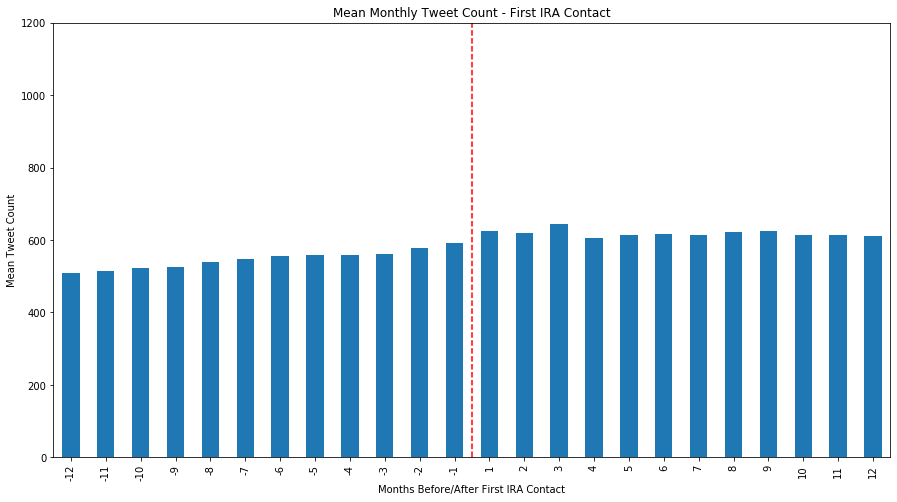

In [40]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_count.mean().plot(kind='bar', figsize=(15,8),
                            title='Mean Monthly Tweet Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean1_NONRESPONSIVE.png')
# plt.savefig('BefAfmean1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


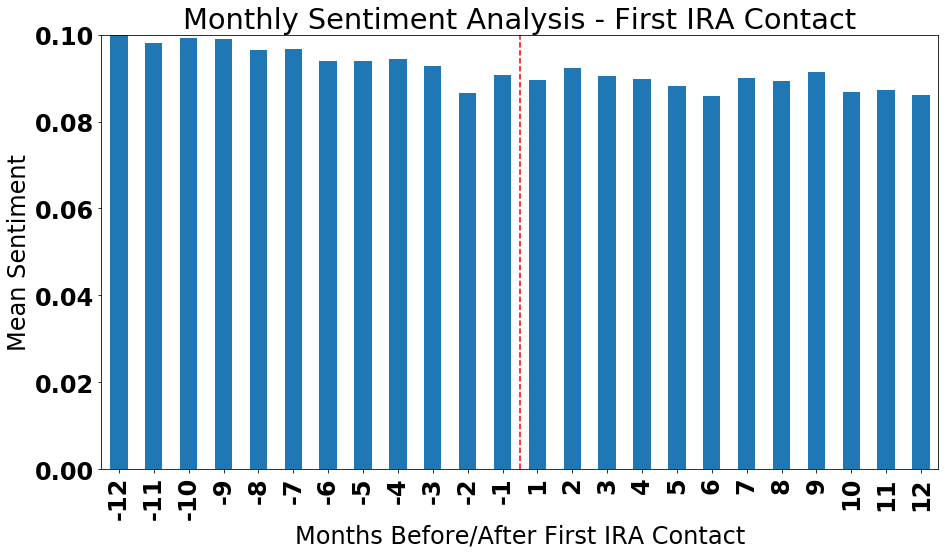

In [41]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Sentiment Analysis - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=0.10)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent1_NONRESPONSIVE.png')
# plt.savefig('BefAfsent1_noresponse.png')
plt.show()

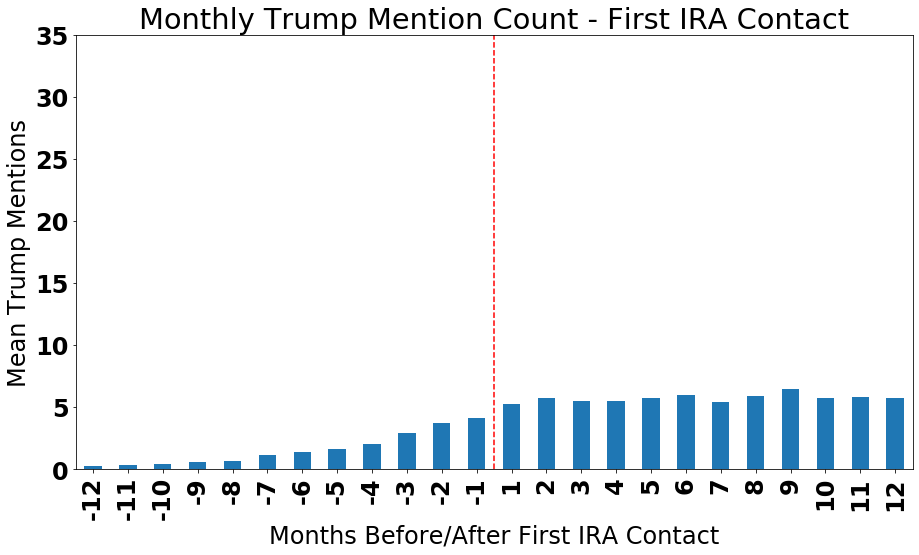

In [42]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

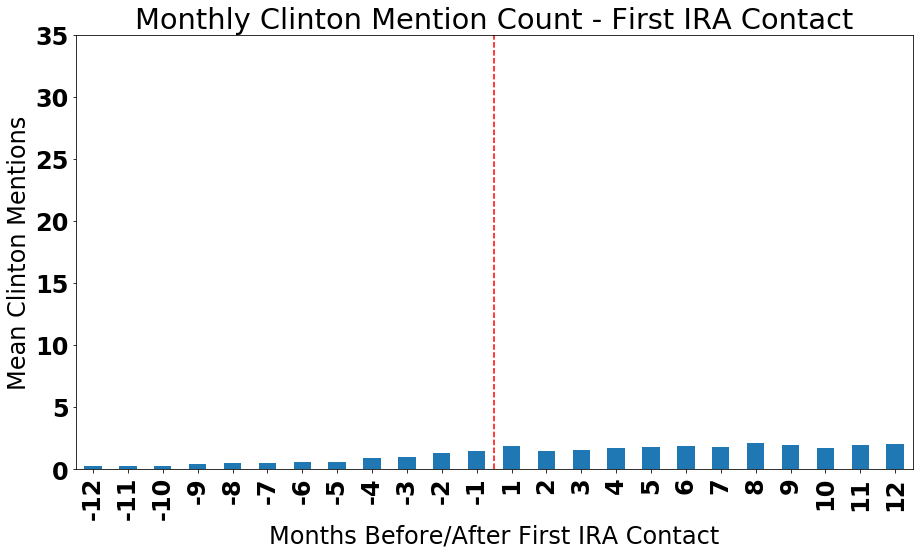

In [43]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Count - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton1_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton1_noresponse.png')
plt.show()

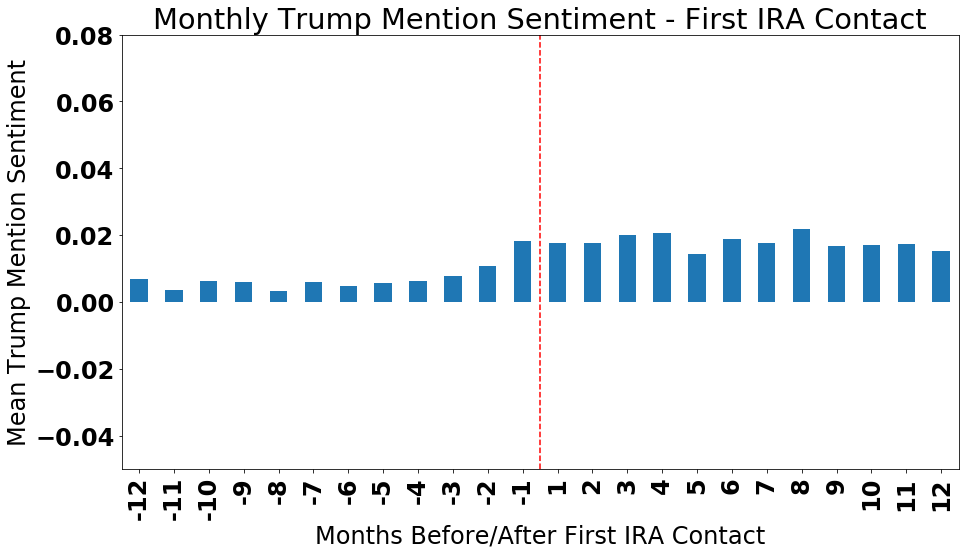

In [44]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_trump_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Trump Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


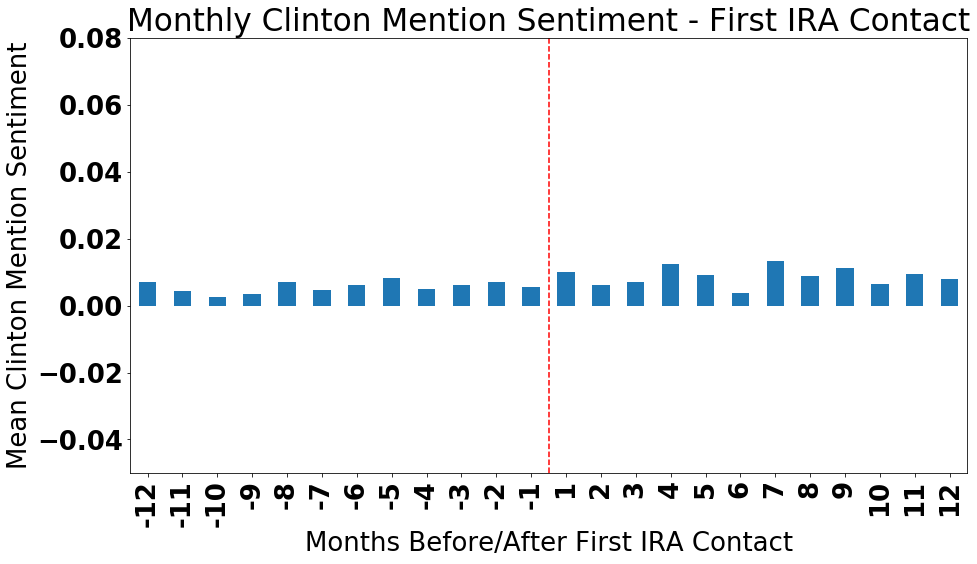

In [45]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Clinton Mention Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

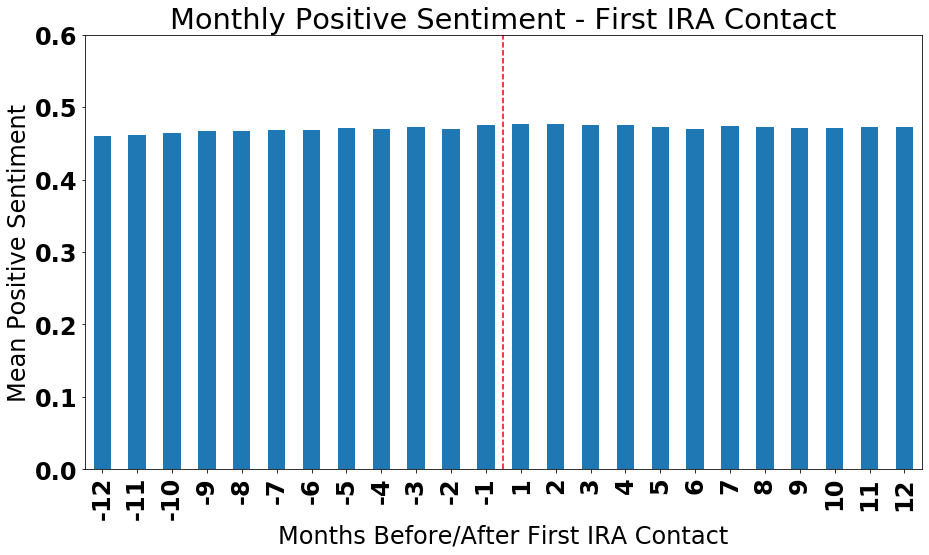

In [46]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_positive_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Positive Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfpositive_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

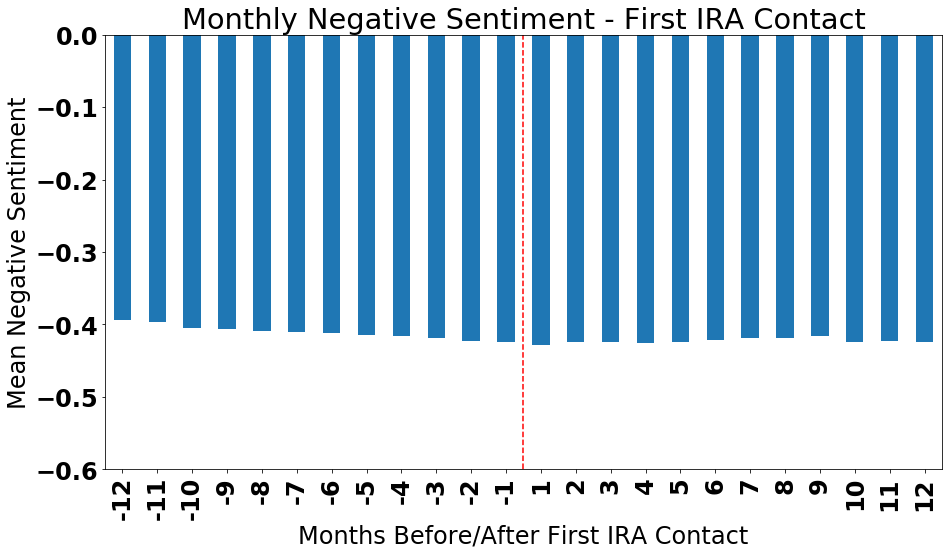

In [47]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year1DF_negative_sent.mean().plot(kind='bar', figsize=(15,8),
                            title='Monthly Negative Sentiment - First IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After First IRA Contact')
plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent1_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Two Plots**

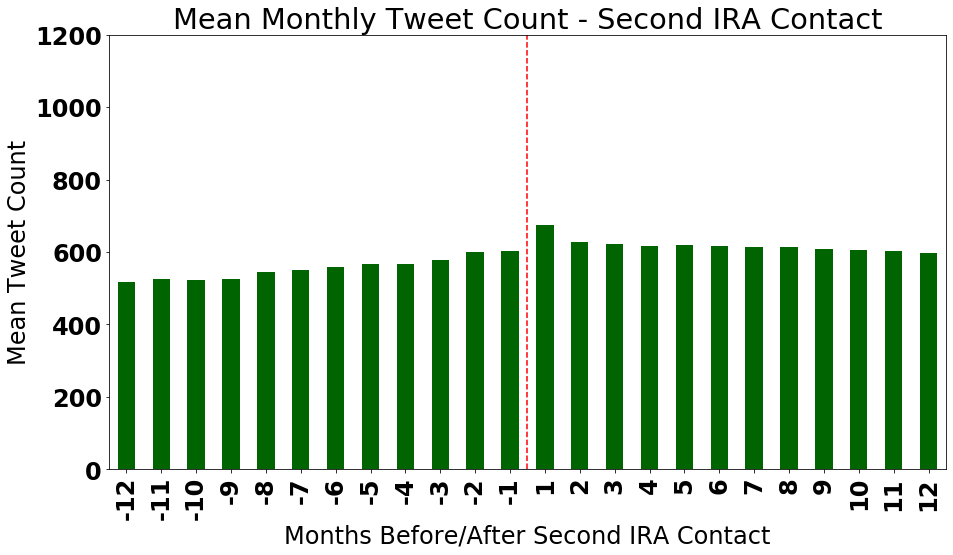

In [48]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'darkgreen',
                            title='Mean Monthly Tweet Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean2_NONRESPONSIVE.png')
# plt.savefig('BefAfmean2_noresponse.png')
plt.show()

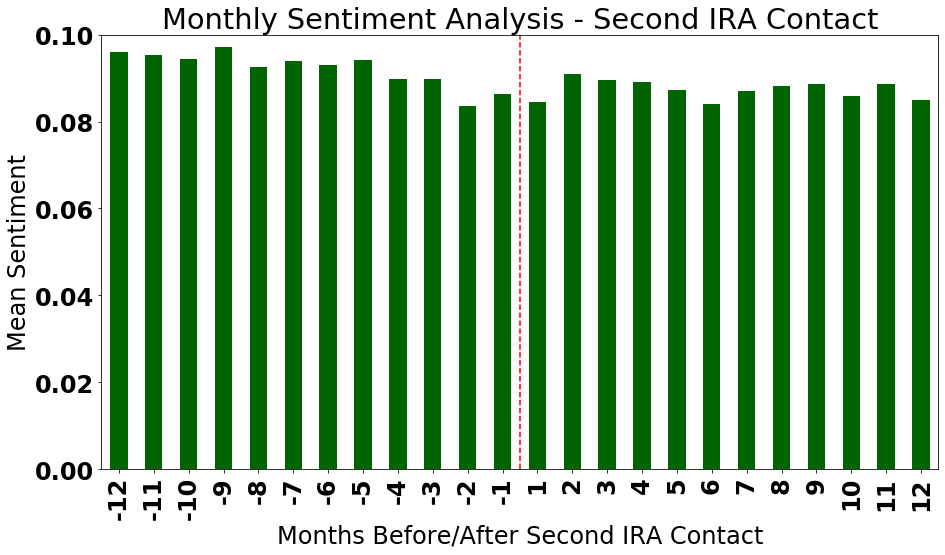

In [49]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='darkgreen',
                            title='Monthly Sentiment Analysis - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent2_NONRESPONSIVE.png')
# plt.savefig('BefAfsent2_noresponse.png')
plt.show()

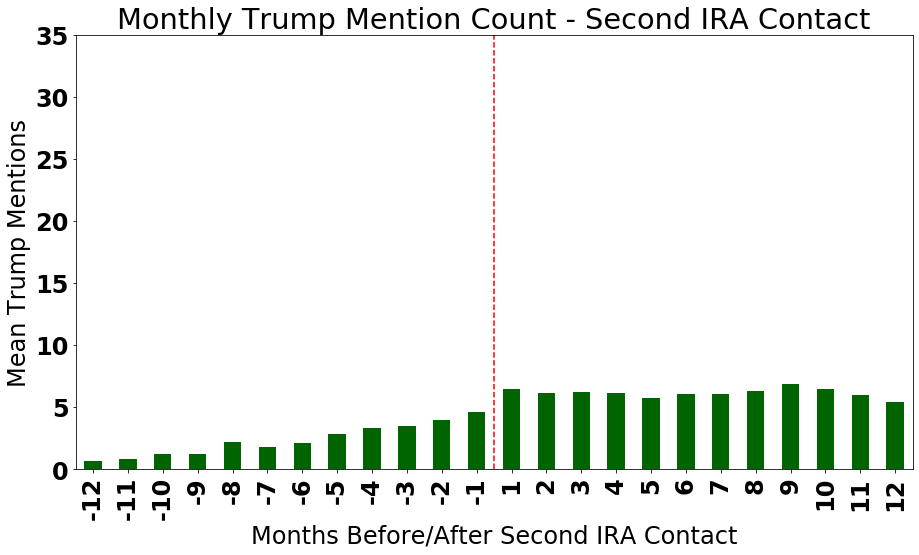

In [50]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')

plt.show()

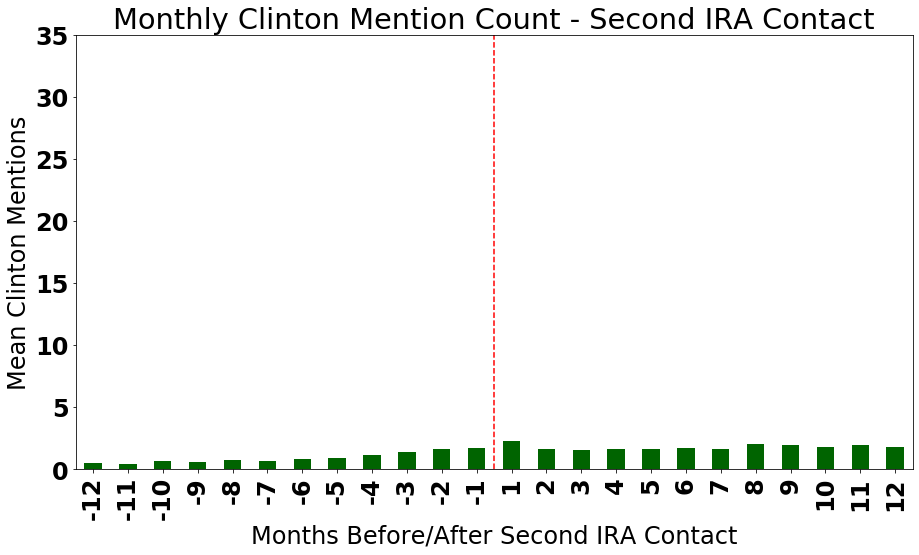

In [51]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Count - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton2_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton2_noresponse.png')

plt.show()

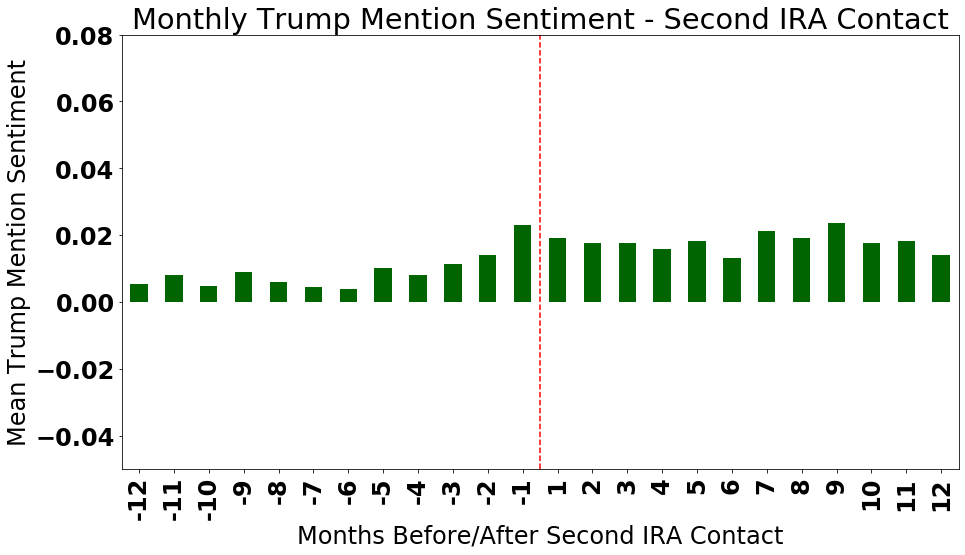

In [52]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Trump Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

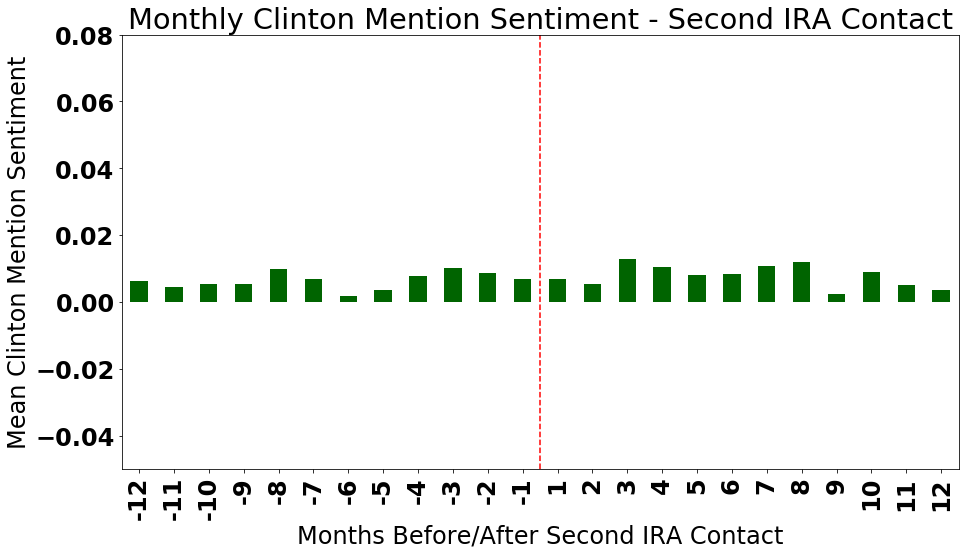

In [53]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Clinton Mention Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump2_noresponse.png')
plt.show()

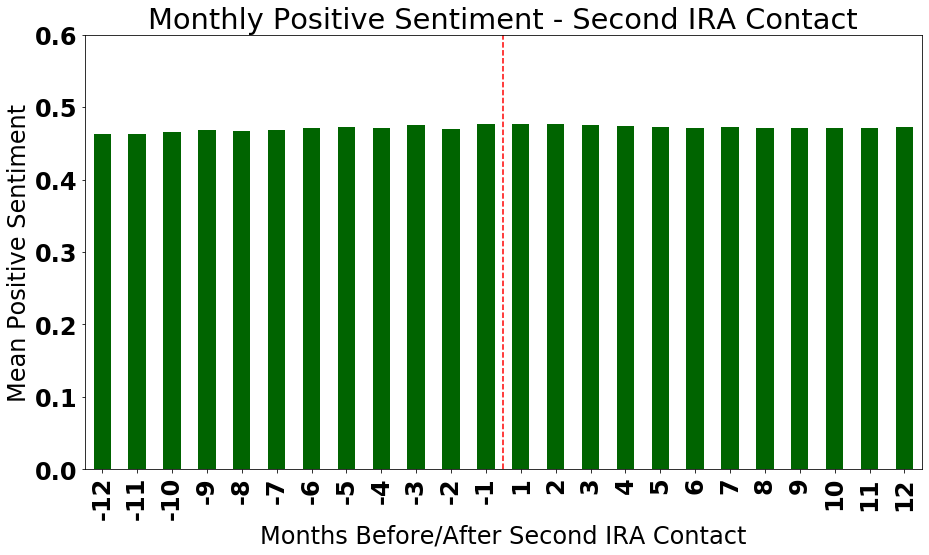

In [54]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Positive Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=.06, bottom=-.05)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidNotRespond/BefAfpositive_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

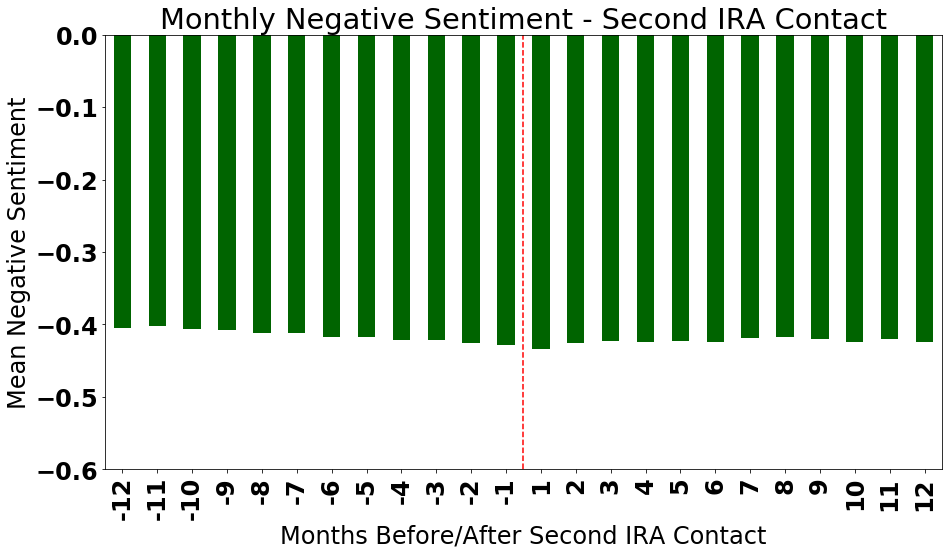

In [55]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year2DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='darkgreen',
                            title='Monthly Negative Sentiment - Second IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Second IRA Contact')
plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent2_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

**Contact Point Three Plots**

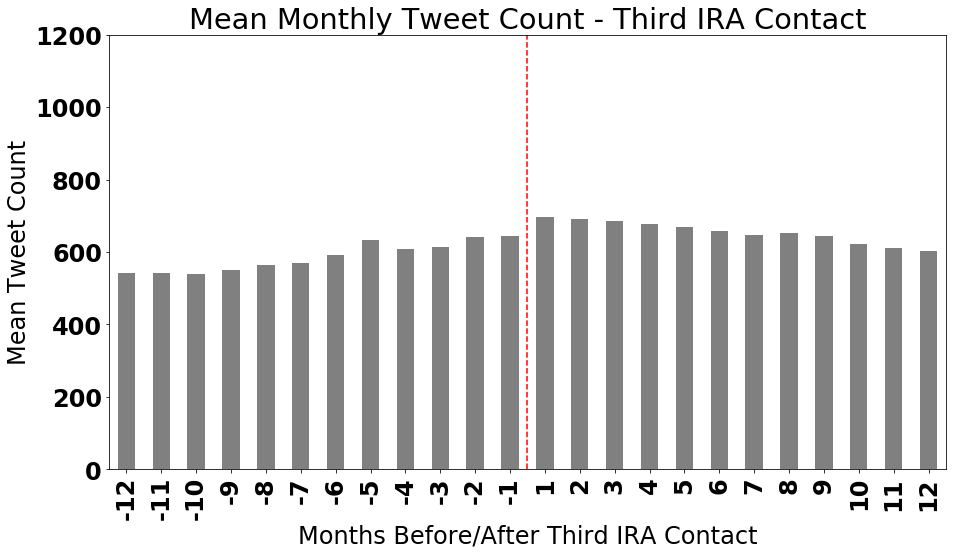

In [56]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_count.mean().plot(kind='bar', figsize=(15,8), color = 'grey',
                            title='Mean Monthly Tweet Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=1200)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Tweet Count')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfmean3_NONRESPONSIVE.png')
# plt.savefig('BefAfmean3_noresponse.png')

plt.show()

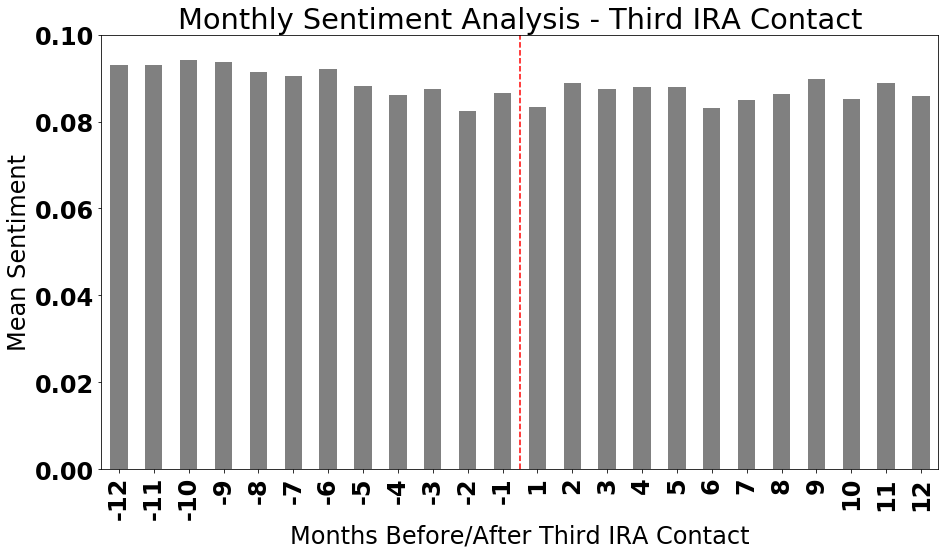

In [57]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_sent.mean().plot(kind='bar', figsize=(15,8), color ='grey',
                            title='Monthly Sentiment Analysis - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0.10)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylabel('Mean Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfsent3_NONRESPONSIVE.png')
# plt.savefig('BefAfsent3_noresponse.png')

plt.show()

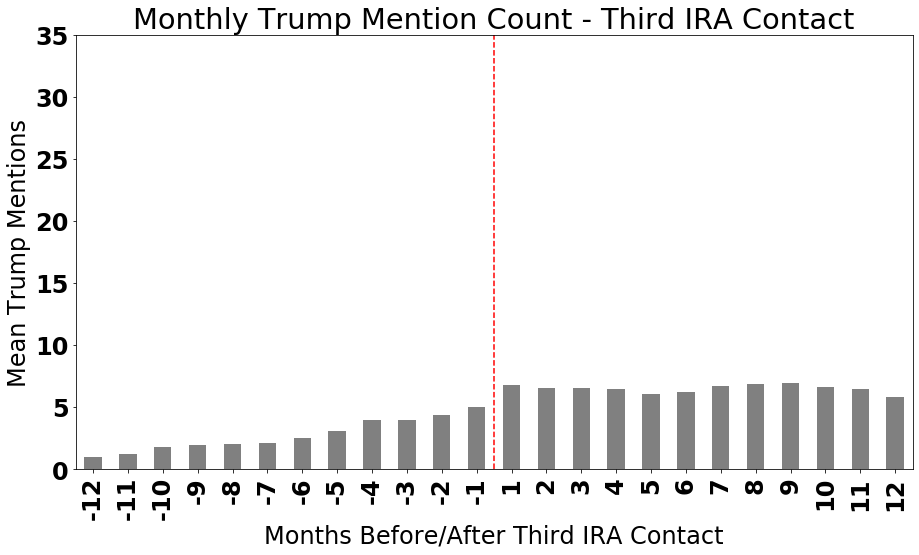

In [58]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=35)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Trump Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

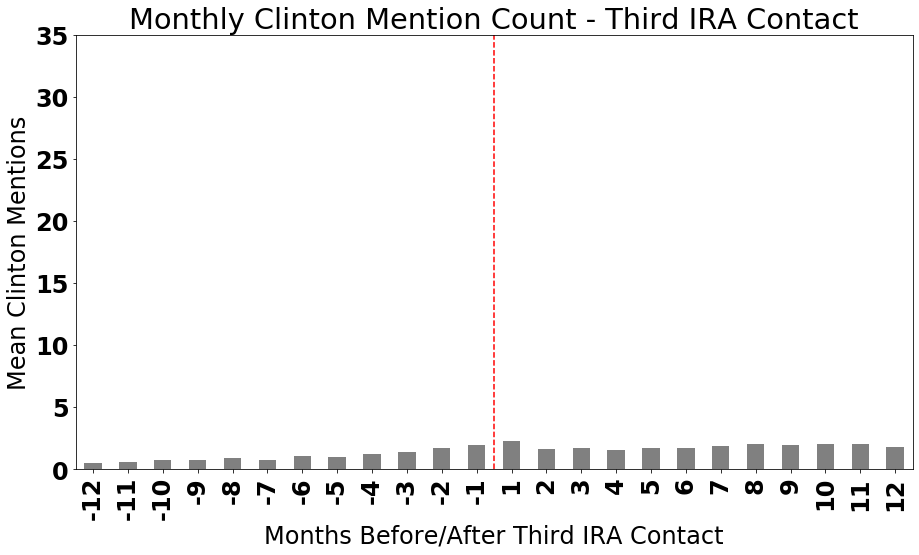

In [59]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Count - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=35)
plt.ylabel('Mean Clinton Mentions')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton3_NONRESPONSIVE.png')
# plt.savefig('BefAfclinton3_noresponse.png')

plt.show()

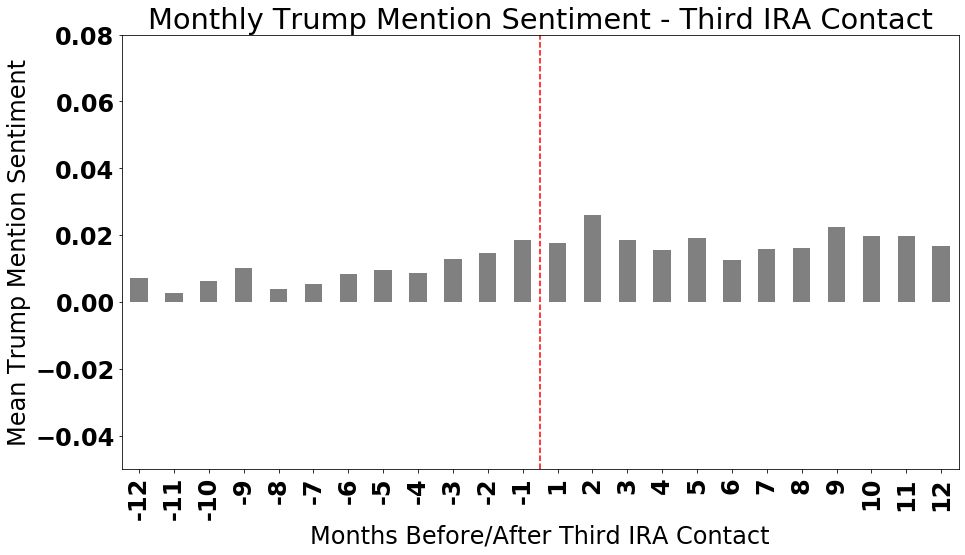

In [60]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_trump_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Trump Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylim(top=.08, bottom=-.05)
plt.ylabel('Mean Trump Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAftrump_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

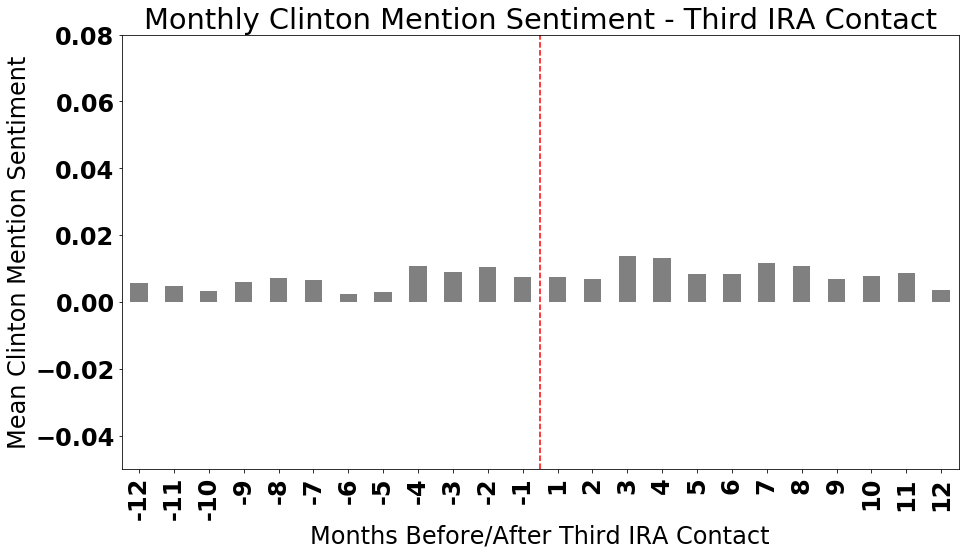

In [61]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_clinton_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Clinton Mention Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
plt.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
plt.ylim(top=.08, bottom=-.05)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.ylabel('Mean Clinton Mention Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_Infl_DidNotRespond/BefAfclinton_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump3_noresponse.png')

plt.show()

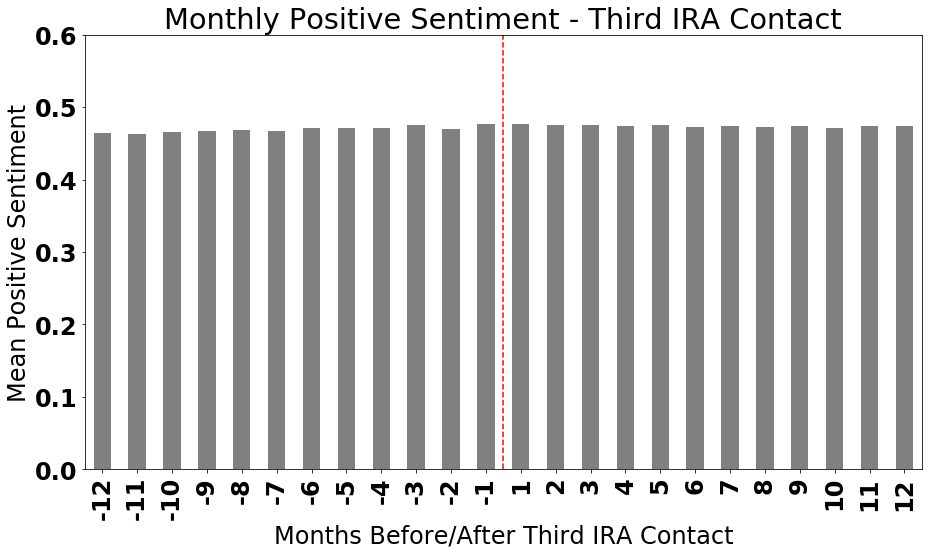

In [62]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_positive_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Positive Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=.6)
plt.ylabel('Mean Positive Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidNotRespond/BefAfpositive_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()

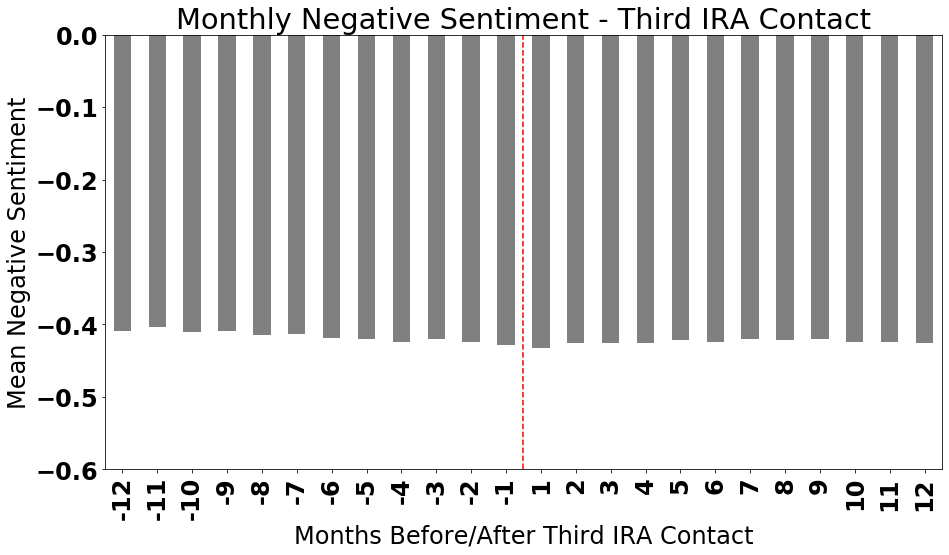

In [63]:
plt.figure()
# ax = english_count_average.mean().plot(color="white")
year3DF_negative_sent.mean().plot(kind='bar', figsize=(15,8), color='grey',
                            title='Monthly Negative Sentiment - Third IRA Contact')
# ax.axhline(6, color="red", linestyle="--")
# ax.axvline(11.5, color="red", linestyle="--")
# plt.ylim(top=25)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
plt.rc('font', **font)
plt.axvline(11.5, color="red", linestyle="--")
plt.ylim(top=0, bottom=-.6)
plt.ylabel('Mean Negative Sentiment')
plt.xlabel('Months Before/After Third IRA Contact')
plt.savefig('BefAft_V3_DidNotRespond/BefAfnegative_sent3_NONRESPONSIVE.png')
# plt.savefig('BefAftrump1_noresponse.png')
plt.show()


In [64]:
# beforeAfterDF.head()
# befAftCounts.head()

In [65]:
# count = 0
# remove_users = []
# for i in range(len(beforeAfterDF)):
# # for i in range(10):
#     first_contact = beforeAfterDF['first_contact'][i]
#     first_tweety = dt.strptime(first_tweet_dict[beforeAfterDF['username'][i]], "%Y-%m-%d")
#     if first_tweety >= first_contact:
#         remove_users.append(beforeAfterDF['username'][i])
# #         print(beforeAfterDF['username'][i])
# #         print(first_tweety)
# #         print(first_contact)
#         count += 1
# print(count)
    

In [66]:
# removeDF = pd.DataFrame(remove_users)

In [67]:
# removeDF.columns = ['username']

In [68]:
# removeDF.head()

In [69]:
# removeDF.to_csv('removeUsers_DidNotMentionBackUsers.csv')